In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phishing-email-dataset/SpamAssasin.csv
/kaggle/input/phishing-email-dataset/Nazario.csv
/kaggle/input/phishing-email-dataset/Nigerian_Fraud.csv
/kaggle/input/phishing-email-dataset/CEAS_08.csv
/kaggle/input/phishing-email-dataset/Enron.csv
/kaggle/input/phishing-email-dataset/Ling.csv
/kaggle/input/phishing-email-dataset/phishing_email.csv


# Week 2 Tasks: Load and Clean Dataset


**- 2.1 Collect and clean a small dataset (e.g., 500 phishing/non-phishing emails).**

**- 2.2 Analyze email distributions for phishing and non-phishing samples, examining basic patterns and statistics.**

**2.1 Collect and clean a small dataset (e.g., 500 phishing/non-phishing emails)**
- Got & Analyzed Dataset
- Cleaned Data
- Balaced Dataset
- Created a Sample Dataset of 500 Emails
- Analyzes Sample Dataset

In [2]:
# STEP 1: DATA 
    # Phishing Email Dataset
df = pd.read_csv('/kaggle/input/phishing-email-dataset/phishing_email.csv')

In [3]:
# feature 1 (text_combined) - serves at INPUT for our model
    # full textual data for each email 
    # subject line, body, date, sender's email
# feature 2 (label) - serves as OUTPUT for our model
    # binary representation of phishing or no
    # 1 = Phishing
    # 0 = Not Phishing
print(df.head())

                                       text_combined  label
0  hpl nom may 25 2001 see attached file hplno 52...      0
1  nom actual vols 24 th forwarded sabrae zajac h...      0
2  enron actuals march 30 april 1 201 estimated a...      0
3  hpl nom may 30 2001 see attached file hplno 53...      0
4  hpl nom june 1 2001 see attached file hplno 60...      0


In [4]:
print(df.columns)

Index(['text_combined', 'label'], dtype='object')


In [5]:
# STEP 2: DATA PREPROCESSING 
    # Following https://builtin.com/machine-learning/how-to-preprocess-data-python

In [6]:
# Dropping Data Not Needed
df = df.dropna()

In [7]:
# Dropping N/A Values
print(df.isnull().sum())

text_combined    0
label            0
dtype: int64


In [8]:
# Dropping Duplicates
df = df.drop_duplicates()

In [9]:
# Balance Dataset 
print(df['label'].value_counts())
phishing_emails = df[df['label'] == 1]
non_phishing_emails = df[df['label'] == 0]

label
1    42845
0    39233
Name: count, dtype: int64


In [10]:
# Create New Dataset (250 Phishing/250 Non-Phishing)
phishing_sample = phishing_emails.sample(n=250, random_state=42)
non_phishing_sample = non_phishing_emails.sample(n=250, random_state=42)
df_sample = pd.concat([phishing_sample, non_phishing_sample]).reset_index(drop=True)
df_sample = df_sample.sample(frac=1, random_state=42).reset_index(drop=True)

In [11]:
# CSV
df_sample.to_csv('cleaned_phishing_dataset.csv', index=False)

In [12]:
rows, cols = df_sample.shape
print(f"The dataset contains {rows} rows and {cols} columns.")

The dataset contains 500 rows and 2 columns.


In [13]:
print("Displaying the first 5 rows of the dataset:\n")
print(df_sample.head())

Displaying the first 5 rows of the dataset:

                                       text_combined  label
0  nutiffxstmasseyacnz past three weeks jazz stud...      0
1  daily top 10 tasselh1981prudiuscom daily top 1...      1
2  enews small business irsservicegovdeliverycom ...      0
3  paypal supportmetalatcomtr paypal notamos algu...      1
4  hilary davenport berlineryotfoundationsukcom p...      1


**2.2 Analyze email distributions for phishing and non-phishing samples, examining basic patterns and statistics.**
- Data Breakdown
- Text Length Histogram
- Text Length Line Plot
- Word Count Histogram
- Word Count Line Plot
- Analyze Most Common Words - Word Cloud
- Got Rid of Unimporant Words (Nums, Dates, Months, etc.)
- Created Function to Get Top 10 Most Important Words
- Applied TF-IDF for NLP Pre-Processing

In [14]:
# TF-IDF (tokenization automatically done)
    # note to self: check this out later
    # https://datascience.stackexchange.com/questions/104860/what-is-the-best-way-to-limit-number-of-features-in-tf-idf

# Purpose: text to num data, each email is represented by a vector
    # numbers from 0 to 1 based on importance of word
        # high - important in a specific document + doesn't appear in many other documents
        # low - not important + common

# 70/30 Training/Testing Split

X = df_sample['text_combined'] 
y = df_sample['label']         
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

tfidf = TfidfVectorizer(max_features=5000)  
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print("Shape of training TF-IDF matrix:", X_train_tfidf.shape)
print("Shape of testing TF-IDF matrix:", X_test_tfidf.shape)

Shape of training TF-IDF matrix: (350, 5000)
Shape of testing TF-IDF matrix: (150, 5000)


In [15]:
label_counts = df_sample['label'].value_counts()

print(f"Phishing emails (label=1): {label_counts.get(1, 0)}")
print(f"Non-phishing emails (label=0): {label_counts.get(0, 0)}")

Phishing emails (label=1): 250
Non-phishing emails (label=0): 250


In [16]:
# Check Text Length

df_sample['text_length'] = df_sample['text_combined'].apply(len)
avg_text_length = df_sample.groupby('label')['text_length'].mean()
for label, length in avg_text_length.items():
    label_name = "Non-Phishing" if label == 0 else "Phishing"
    print(f"Average text length for {label_name} emails: {length:.2f} characters")

Average text length for Non-Phishing emails: 1671.50 characters
Average text length for Phishing emails: 858.78 characters


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


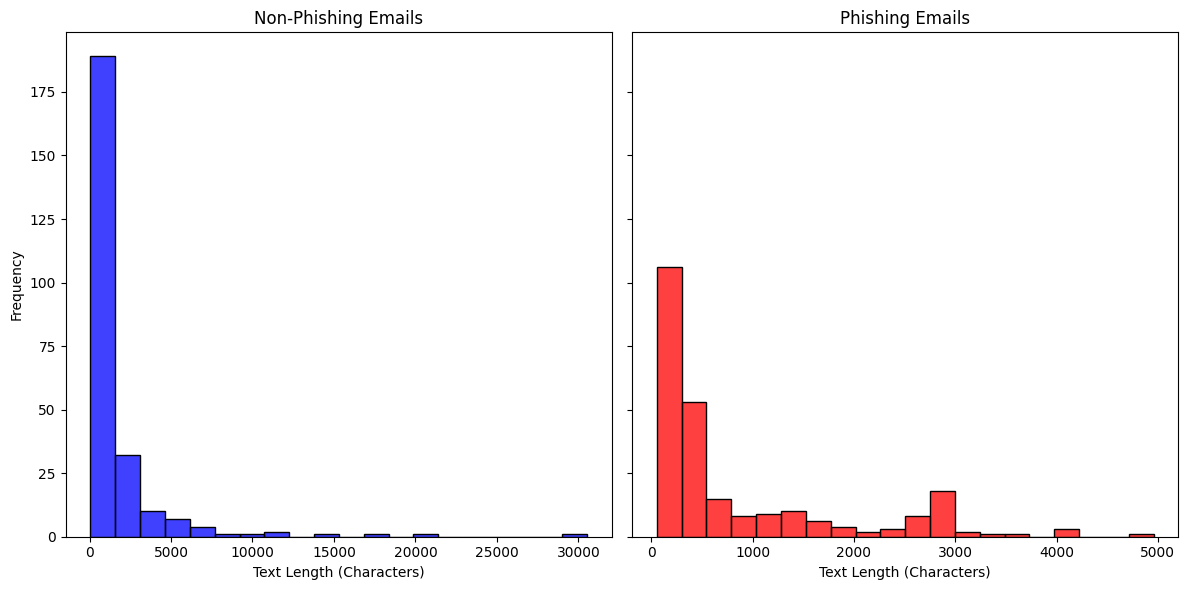

In [17]:
# Histograms (Non-Phishing v.s. Phishing)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.histplot(df_sample[df_sample['label'] == 0]['text_length'], bins=20, kde=False, ax=axes[0], color='blue')
axes[0].set_title("Non-Phishing Emails")
axes[0].set_xlabel("Text Length (Characters)")
axes[0].set_ylabel("Frequency")

sns.histplot(df_sample[df_sample['label'] == 1]['text_length'], bins=20, kde=False, ax=axes[1], color='red')
axes[1].set_title("Phishing Emails")
axes[1].set_xlabel("Text Length (Characters)")

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


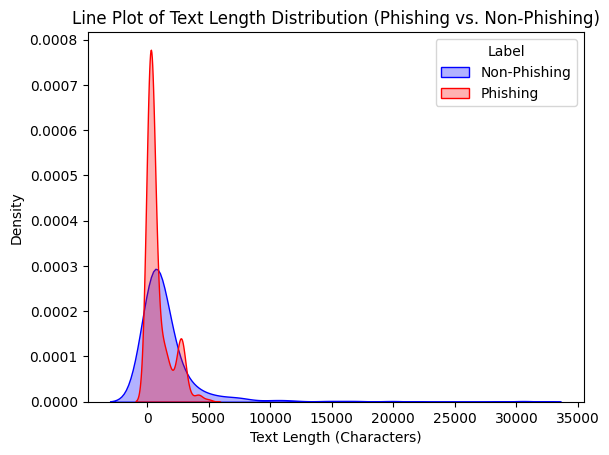

In [18]:
# Line Plot
sns.kdeplot(data=df_sample[df_sample['label'] == 0]['text_length'], label='Non-Phishing', color='blue', fill=True, alpha=0.3)
sns.kdeplot(data=df_sample[df_sample['label'] == 1]['text_length'], label='Phishing', color='red', fill=True, alpha=0.3)

plt.title("Line Plot of Text Length Distribution (Phishing vs. Non-Phishing)")
plt.xlabel("Text Length (Characters)")
plt.ylabel("Density")
plt.legend(title="Label")
plt.show()

In [19]:
# Word Count Analysis

df_sample['word_count'] = df_sample['text_combined'].apply(lambda x: len(x.split()))
avg_word_count = df_sample.groupby('label')['word_count'].mean()

for label, avg_count in avg_word_count.items():
    label_name = "Non-Phishing" if label == 0 else "Phishing"
    print(f"The average word count for {label_name} emails is {avg_count:.2f} words.")

The average word count for Non-Phishing emails is 221.33 words.
The average word count for Phishing emails is 110.46 words.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


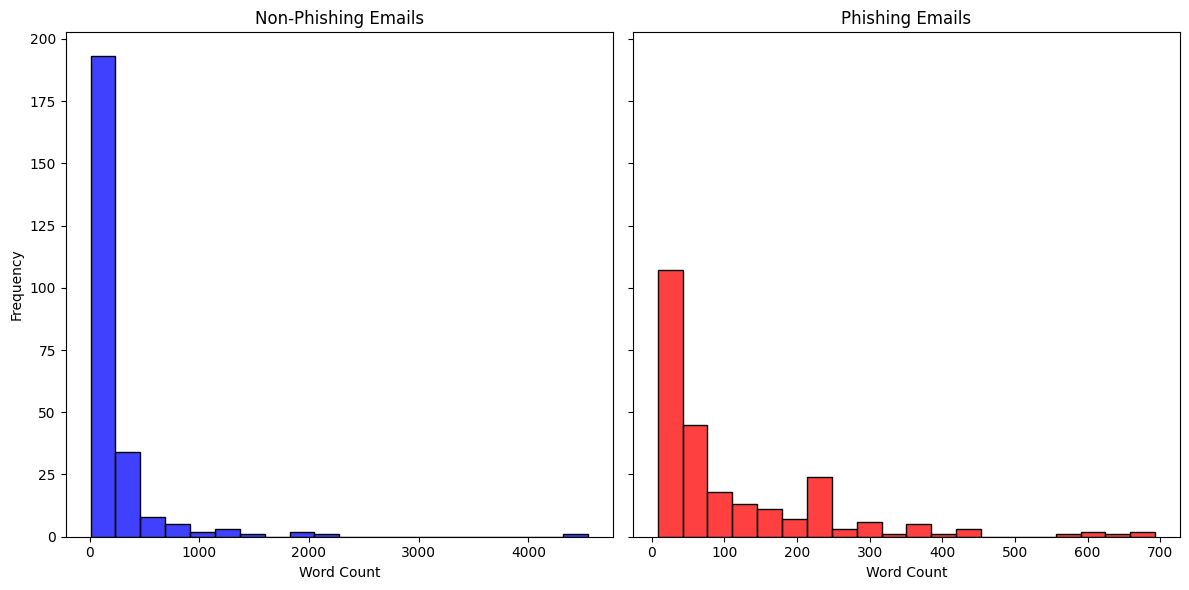

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.histplot(df_sample[df_sample['label'] == 0]['word_count'], bins=20, kde=False, ax=axes[0], color='blue')
axes[0].set_title("Non-Phishing Emails")
axes[0].set_xlabel("Word Count")
axes[0].set_ylabel("Frequency")

sns.histplot(df_sample[df_sample['label'] == 1]['word_count'], bins=20, kde=False, ax=axes[1], color='red')
axes[1].set_title("Phishing Emails")
axes[1].set_xlabel("Word Count")

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


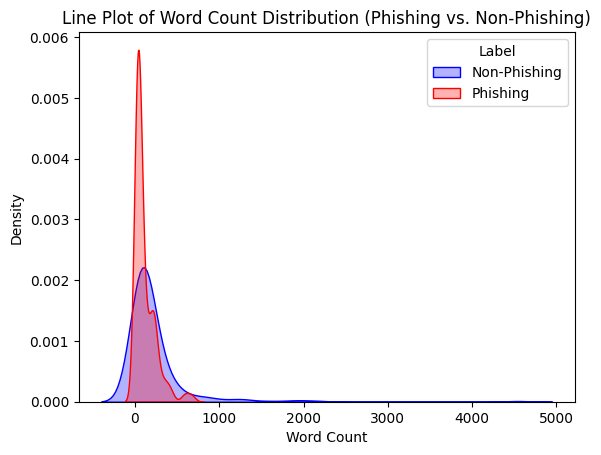

In [21]:
sns.kdeplot(data=df_sample[df_sample['label'] == 0]['word_count'], label='Non-Phishing', color='blue', fill=True, alpha=0.3)
sns.kdeplot(data=df_sample[df_sample['label'] == 1]['word_count'], label='Phishing', color='red', fill=True, alpha=0.3)

plt.title("Line Plot of Word Count Distribution (Phishing vs. Non-Phishing)")
plt.xlabel("Word Count")
plt.ylabel("Density")
plt.legend(title="Label")
plt.show()

In [22]:
import re


# Find Most Important Words in Phishing v.s. Non-Phishing Emails
    #removed punctuation, dates, nums, etc.
def preprocess_text(text, unwanted_terms):
    text = text.lower()
    text = re.sub(r'\b\d+\b', '', text) 
    text = re.sub(r'\b(?:mon|tue|wed|thu|fri|sat|sun)\b', '', text, flags=re.IGNORECASE) 
    text = re.sub(r'\b(?:jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec)\b', '', text, flags=re.IGNORECASE)  
    for term in unwanted_terms:
        text = re.sub(rf'\b{term}\b', '', text, flags=re.IGNORECASE)
    text = re.sub(r'[^\w\s]', '', text)  
    text = re.sub(r'\s+', ' ', text).strip()  

    return text

In [23]:
unwanted_terms = ['enron', 'hpl', 'nom', 'forwarded'] 
df_sample['text_combined'] = df_sample['text_combined'].apply(lambda x: preprocess_text(x, unwanted_terms))

In [24]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()

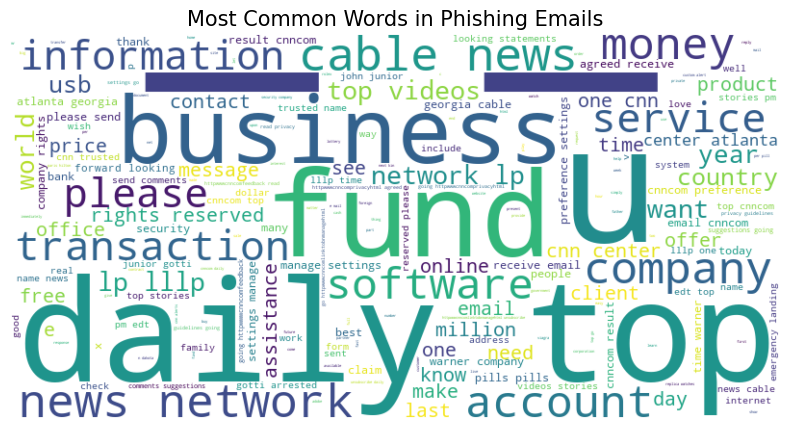

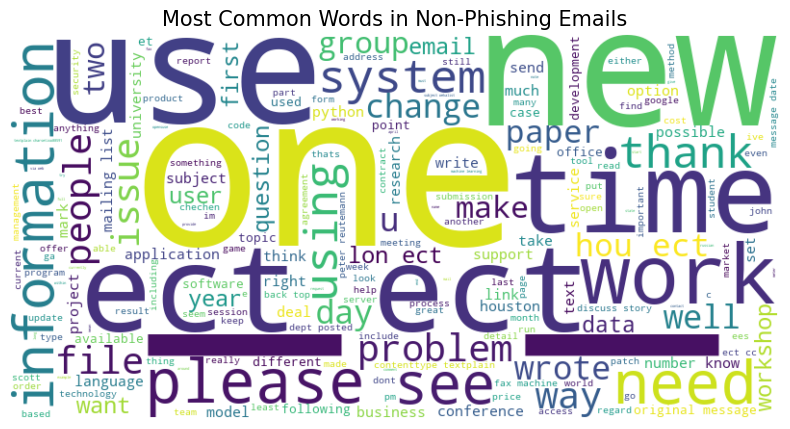

In [25]:
phishing_text = df_sample[df_sample['label'] == 1]['text_combined']
non_phishing_text = df_sample[df_sample['label'] == 0]['text_combined']
plot_wordcloud(phishing_text, "Most Common Words in Phishing Emails")
plot_wordcloud(non_phishing_text, "Most Common Words in Non-Phishing Emails")

In [26]:
def get_top_n_words(text, n=10):
    vectorizer = CountVectorizer(stop_words='english') 
    word_count = vectorizer.fit_transform(text)
    word_freq = dict(zip(vectorizer.get_feature_names_out(), word_count.sum(axis=0).A1))
    sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    return sorted_words[:n]

In [27]:
# Top 10 Words
phishing_top_words = get_top_n_words(phishing_text, n=10)
non_phishing_top_words = get_top_n_words(non_phishing_text, n=10)

print("Top 10 Words in Phishing Emails:")
for word, freq in phishing_top_words:
    print(f"{word}: {freq}")

print("\nTop 10 Words in Non-Phishing Emails:")
for word, freq in non_phishing_top_words:
    print(f"{word}: {freq}")

Top 10 Words in Phishing Emails:
email: 117
company: 108
news: 106
cnncom: 88
time: 83
daily: 82
information: 74
new: 72
account: 68
cnn: 64

Top 10 Words in Non-Phishing Emails:
ect: 268
new: 181
message: 178
subject: 164
list: 133
use: 124
like: 119
university: 118
information: 111
web: 108


In [28]:
# Pie Chart (Phishing v.s. Non-Phishing)
label_counts = df_sample['label'].value_counts()
labels = ['Non-Phishing', 'Phishing']
sizes = label_counts.values
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)

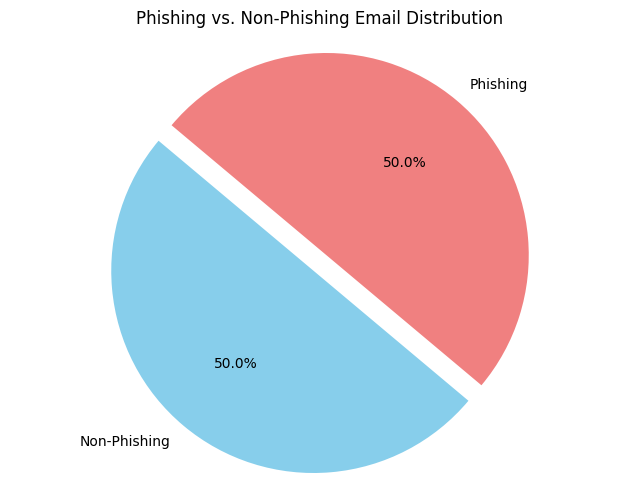

In [29]:
plt.figure(figsize=(8, 6))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    explode=explode
)
plt.title('Phishing vs. Non-Phishing Email Distribution')
plt.axis('equal') 
plt.show()

**3. Build a simple model (e.g., logistic regression or decision tree) to classify phishing emails, demonstrating basic functionality.**
- 3.1 Random Forest
- 3.2 Logistic Regression
- 3.3 SVM
- 3.4 XGBoost

**Model 1 - Random Forest (83% Accuracy)**
- Fit/Run Model - **- Tune the model to reach >65% accuracy on test data (Week 4 Weekly Requirement)**
- Classification Report
- Accuracy/Error Rates **- (Week 4 Data Science Requirement)**
- Calculate Estimators (For Tree-Based Models) For Plot
- Linear Plot Accuracy/Error Rates
- Confusion Matrix
- ROC Curve and AUC Curve **- (Week 4 Data Science Requirement)**
- Pie Chart Phishing v.s. Non-Phishing Distribution **- (Week 3 Data Science Requirement)**
- Matthews Correlation Coefficient (MCC)
- Log Loss

In [30]:
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)
y_pred_proba_rf = rf_model.predict_proba(X_test_tfidf)[:, 1]

In [31]:
# Random Forest Classification Report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        75
           1       0.84      0.81      0.82        75

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



In [32]:
# Random Forest Accuracy and Error Rate
accuracy_rf = accuracy_score(y_test, y_pred_rf)
error_rate_rf = 1 - accuracy_rf
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest Error Rate: {error_rate_rf:.2f}")

Random Forest Accuracy: 0.83
Random Forest Error Rate: 0.17


PENTING!!!!!: bisa nyoba finetune grid seacrh, dll.

In [33]:
estimators = list(range(10, 201, 20)) 
accuracy_scores = []
error_rates = []
for n in estimators:
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_model.fit(X_train_tfidf, y_train)
    y_pred_rf = rf_model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred_rf)
    error_rate = 1 - acc
    accuracy_scores.append(acc)
    error_rates.append(error_rate)

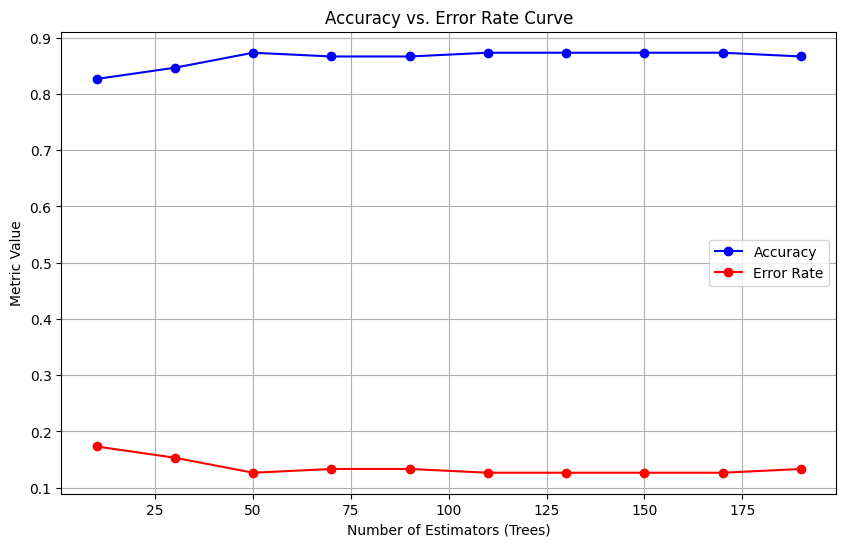

In [34]:
# Accuracy v.s. Error Rate Line Plot
plt.figure(figsize=(10, 6))
plt.plot(estimators, accuracy_scores, label='Accuracy', marker='o', color='blue') # estimators instead of c-values
plt.plot(estimators, error_rates, label='Error Rate', marker='o', color='red')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Metric Value')
plt.title('Accuracy vs. Error Rate Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [35]:
# Random Forest Confusion matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix)


Confusion Matrix:
[[61 14]
 [ 6 69]]


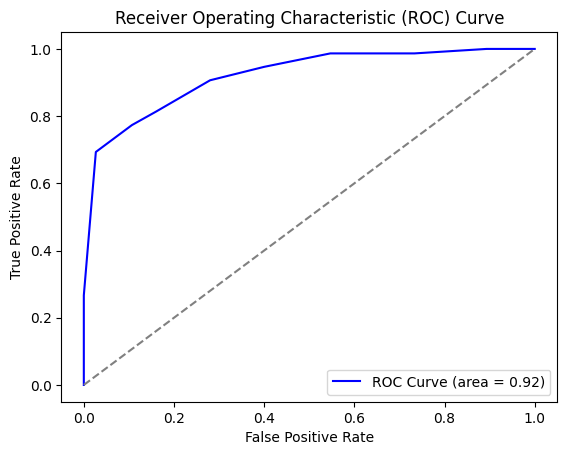

AUC: 0.92


In [36]:
# Random Forest ROC Curve and AUC
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rf)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

In [37]:
pred_counts = pd.Series(y_pred_rf).value_counts()
labels = ['Non-Phishing', 'Phishing']
sizes = pred_counts.values
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)

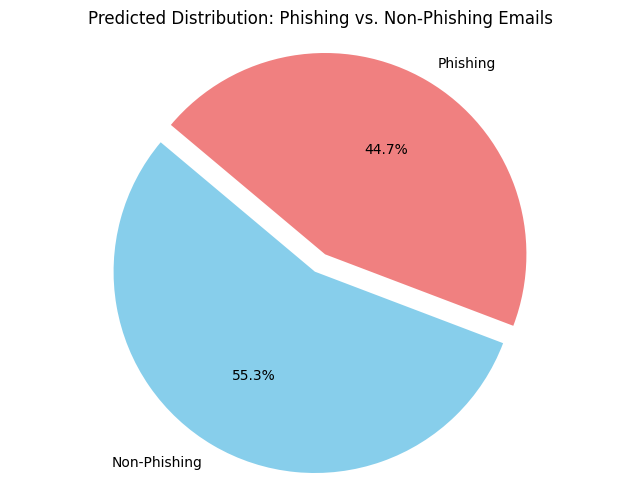

In [38]:
# Pie Chart Phishing v.s. Non-Phishing Distribution
plt.figure(figsize=(8, 6))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    explode=explode
)
plt.title('Predicted Distribution: Phishing vs. Non-Phishing Emails')
plt.axis('equal')  
plt.show()

In [39]:
# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred_rf)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

Matthews Correlation Coefficient (MCC): 0.74


In [40]:
# Random Forest Log Loss
log_loss_value = log_loss(y_test, y_pred_proba_rf)
print(f"Log Loss: {log_loss_value:.2f}")

Log Loss: 0.38


**Model 2 - Logistical Regression (93% Accuracy)**
- Fit/Run Model **- Tune the model to reach >65% accuracy on test data (Week 4 Weekly Requirement)**
- Classification Report
- Accuracy/Error Rates **- (Week 4 Data Science Requirement)**
- Calculate C-Values (For Non-Tree Models) For Plot
- Linear Plot Accuracy/Error Rates
- Confusion Matrix
- ROC Curve and AUC Curve **- (Week 4 Data Science Requirement)**
- Pie Chart Phishing v.s. Non-Phishing Distribution **- (Week 3 Data Science Requirement)**
- Matthews Correlation Coefficient (MCC)
- Log Loss

In [41]:
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train_tfidf, y_train)
y_pred_logreg = logreg_model.predict(X_test_tfidf)
y_pred_proba_logreg = logreg_model.predict_proba(X_test_tfidf)[:, 1]

In [42]:
# Logistic Regression Classification Report
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        75
           1       0.96      0.89      0.92        75

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150



In [43]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
error_rate_logreg = 1 - accuracy_logreg
print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")
print(f"Logistic Regression Error Rate: {error_rate_logreg:.2f}")

Logistic Regression Accuracy: 0.93
Logistic Regression Error Rate: 0.07


In [44]:
# c-values for log regression
c_values = np.logspace(-3, 3, 10)  # c-values for log regression
accuracy_scores = []
error_rates = []
for c in c_values:
    logreg_model = LogisticRegression(C=c, max_iter=1000, random_state=42)
    logreg_model.fit(X_train_tfidf, y_train)
    y_pred_logreg = logreg_model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred_logreg)
    error_rate = 1 - acc
    accuracy_scores.append(acc)
    error_rates.append(error_rate)

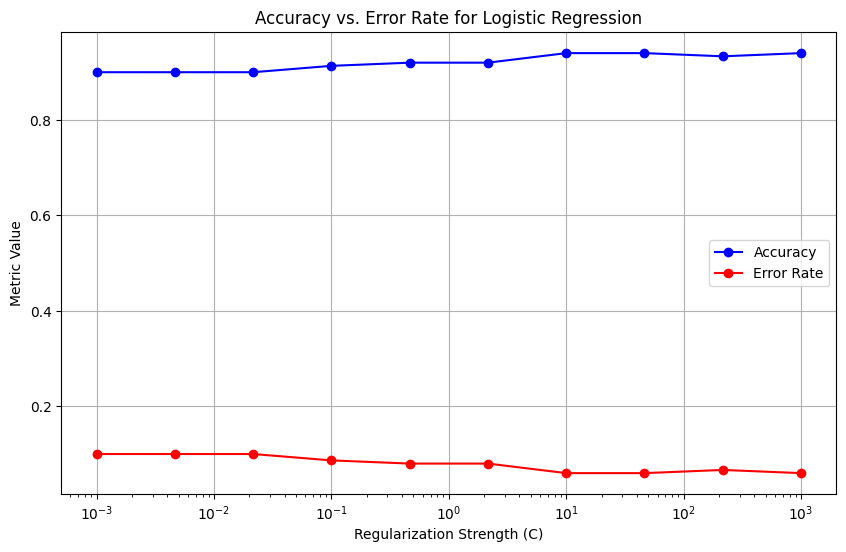

In [45]:
# Accuracy vs. Error Rate
plt.figure(figsize=(10, 6))
plt.plot(c_values, accuracy_scores, label='Accuracy', marker='o', color='blue')
plt.plot(c_values, error_rates, label='Error Rate', marker='o', color='red')
plt.xscale('log')  
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Metric Value')
plt.title('Accuracy vs. Error Rate for Logistic Regression')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [46]:
# Logistic Regression Confusion Matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
print(conf_matrix)


Confusion Matrix:
[[70  5]
 [ 4 71]]


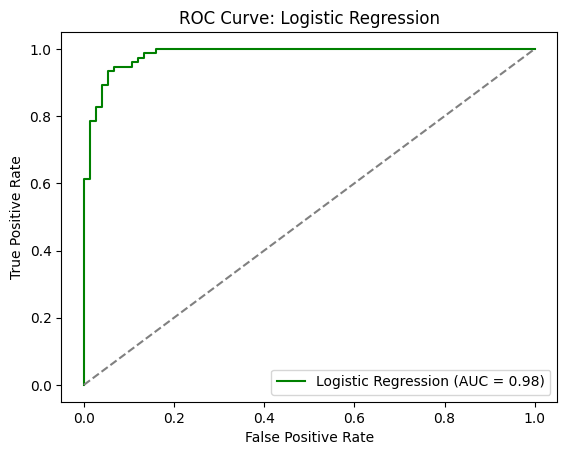

AUC: 0.98


In [47]:
# Logistic Regression ROC Curve and AUC
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg)

plt.figure()
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})', color='green')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic Regression')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc_logreg:.2f}")

In [48]:
pred_counts_logreg = pd.Series(y_pred_logreg).value_counts()
labels = ['Non-Phishing', 'Phishing']  # Assuming 0 = Non-Phishing, 1 = Phishing
sizes = pred_counts_logreg.values
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)

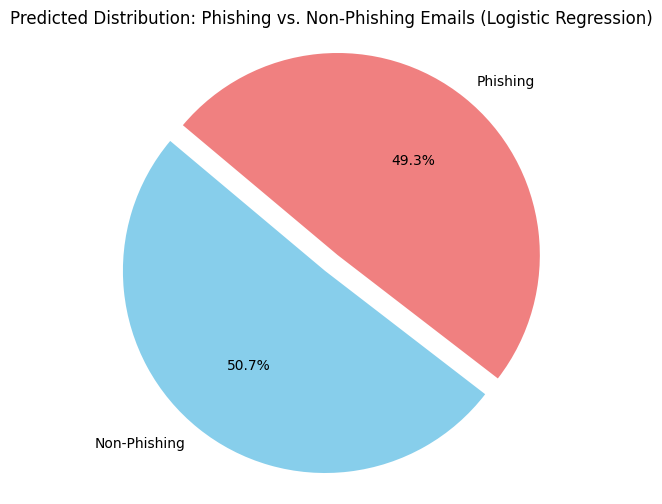

In [49]:
plt.figure(figsize=(8, 6))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    explode=explode
)
plt.title('Predicted Distribution: Phishing vs. Non-Phishing Emails (Logistic Regression)')
plt.axis('equal')  
plt.show()

In [50]:
# Logistical Regression Matthews Correlation Coefficient (MCC)
mcc_logreg = matthews_corrcoef(y_test, y_pred_logreg)
print(f"Matthews Correlation Coefficient (MCC): {mcc_logreg:.2f}")

Matthews Correlation Coefficient (MCC): 0.88


In [51]:
# Logistical Regression Log Loss
log_loss_value_logreg = log_loss(y_test, y_pred_proba_logreg)
print(f"Log Loss: {log_loss_value_logreg:.2f}")

Log Loss: 0.46


**Model 3 - SVC (94% Accuracy)**
- Fit/Run Model - **- Tune the model to reach >65% accuracy on test data (Week 4 Weekly Requirement)**
- Classification Report
- Accuracy/Error Rates **- (Week 4 Data Science Requirement)**
- Calculate Estimators (For Tree-Based Models) For Plot
- Linear Plot Accuracy/Error Rates
- Confusion Matrix
- ROC Curve and AUC Curve **- (Week 4 Data Science Requirement)**
- Pie Chart Phishing v.s. Non-Phishing Distribution **- (Week 3 Data Science Requirement)**
- Matthews Correlation Coefficient (MCC)
- Log Loss

In [52]:
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)
y_pred_proba_svm = svm_model.predict_proba(X_test_tfidf)[:, 1]

In [53]:
# SVM Classification Report
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        75
           1       0.93      0.95      0.94        75

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



In [54]:
# SVM Accuracy and Error Rate
accuracy_svm = accuracy_score(y_test, y_pred_svm)
error_rate_svm = 1 - accuracy_svm
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"SVM Error Rate: {error_rate_svm:.2f}")

SVM Accuracy: 0.94
SVM Error Rate: 0.06


In [55]:
# c-values for svm
c_values = np.logspace(-3, 3, 10) #
accuracy_scores = []
error_rates = []
for c in c_values:
    svm_model = SVC(kernel='linear', probability=True, C=c, random_state=42)
    svm_model.fit(X_train_tfidf, y_train)
    y_pred_svm = svm_model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred_svm)
    error_rate = 1 - acc
    accuracy_scores.append(acc)
    error_rates.append(error_rate)

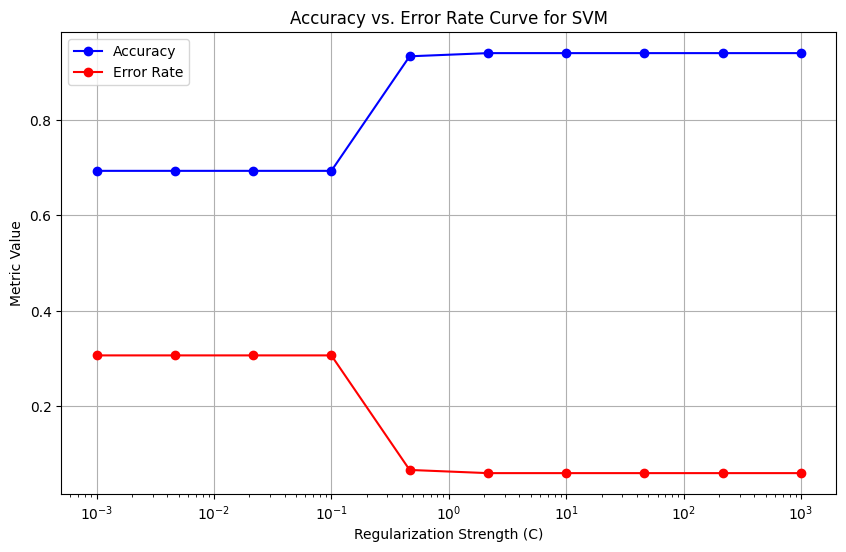

In [56]:
# Accuracy vs. Error Rate Curve
plt.figure(figsize=(10, 6))
plt.plot(c_values, accuracy_scores, label='Accuracy', marker='o', color='blue')
plt.plot(c_values, error_rates, label='Error Rate', marker='o', color='red')
plt.xscale('log')  # Logarithmic scale for C values
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Metric Value')
plt.title('Accuracy vs. Error Rate Curve for SVM')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [57]:
# SVM Confusion Matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print(conf_matrix)


Confusion Matrix:
[[70  5]
 [ 4 71]]


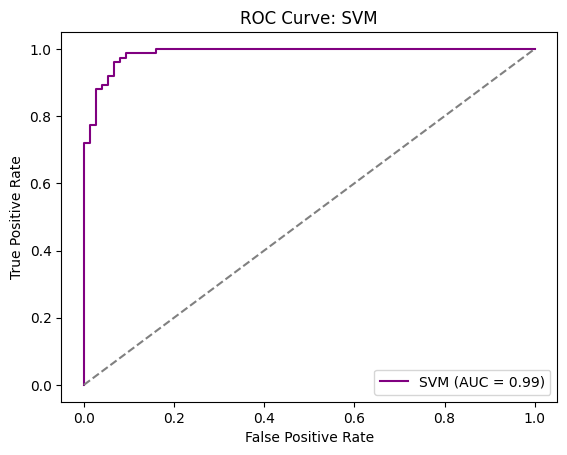

AUC: 0.99


In [58]:
# SVM ROC Curve and AUC
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)

plt.figure()
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})', color='purple')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: SVM')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc_svm:.2f}")

In [59]:
pred_counts_svm = pd.Series(y_pred_svm).value_counts()
labels = ['Non-Phishing', 'Phishing']  
sizes = pred_counts_svm.values
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)

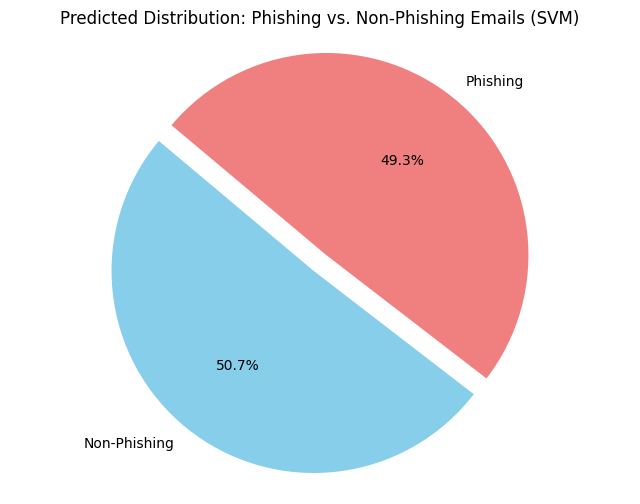

In [60]:
# Pie Chart Phishing v.s. Non-Phishing Distribution
plt.figure(figsize=(8, 6))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    explode=explode
)
plt.title('Predicted Distribution: Phishing vs. Non-Phishing Emails (SVM)')
plt.axis('equal') 
plt.show()

In [61]:
# SVM Matthews Correlation Coefficient (MCC)
mcc_svm = matthews_corrcoef(y_test, y_pred_svm)
print(f"Matthews Correlation Coefficient (MCC): {mcc_svm:.2f}")

Matthews Correlation Coefficient (MCC): 0.88


In [62]:
# SVM Log Loss
log_loss_value_svm = log_loss(y_test, y_pred_proba_svm)
print(f"Log Loss: {log_loss_value_svm:.2f}")

Log Loss: 0.14


**Model 4 - XGBoost (79% Accuracy)**
- Fit/Run Model - **- Tune the model to reach >65% accuracy on test data (Week 4 Weekly Requirement)**
- Classification Report
- Accuracy/Error Rates **- (Week 4 Data Science Requirement)**
- Calculate Estimators (For Tree-Based Models) For Plot
- Linear Plot Accuracy/Error Rates
- Confusion Matrix
- ROC Curve and AUC Curve - **- (Week 4 Data Science Requirement)**
- Pie Chart Phishing v.s. Non-Phishing Distribution **- (Week 3 Data Science Requirement)**
- Matthews Correlation Coefficient (MCC)
- Log Loss

In [63]:
xgb_model = XGBClassifier(
    use_label_encoder=False,  
    eval_metric='logloss', 
    random_state=42
)
xgb_model.fit(X_train_tfidf, y_train)
y_pred_xgb = xgb_model.predict(X_test_tfidf)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_tfidf)[:, 1]

In [64]:
# Classification Report
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        75
           1       0.77      0.83      0.79        75

    accuracy                           0.79       150
   macro avg       0.79      0.79      0.79       150
weighted avg       0.79      0.79      0.79       150



In [65]:
# XGBoost Accuracy and Error Rate
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
error_rate_xgb = 1 - accuracy_xgb
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")
print(f"XGBoost Error Rate: {error_rate_xgb:.2f}")

XGBoost Accuracy: 0.79
XGBoost Error Rate: 0.21


In [66]:
# calc estimators
n_estimators_range = list(range(10, 110, 20))
accuracy_scores = []
error_rates = []
for n in n_estimators_range:
    xgb_model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        n_estimators=n,
        random_state=42
    )
    xgb_model.fit(X_train_tfidf, y_train)
    y_pred_xgb = xgb_model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred_xgb)
    error_rate = 1 - acc
    accuracy_scores.append(acc)
    error_rates.append(error_rate)

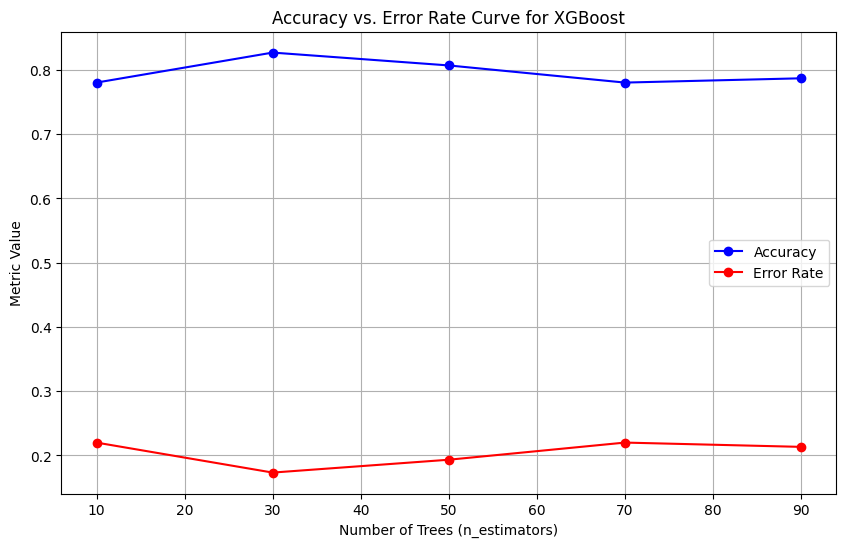

In [67]:
# XGBoost Accuracy vs. Error Rate Curve
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracy_scores, label='Accuracy', marker='o', color='blue')
plt.plot(n_estimators_range, error_rates, label='Error Rate', marker='o', color='red')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Metric Value')
plt.title('Accuracy vs. Error Rate Curve for XGBoost')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [68]:
# XGBoost Confusion Matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print(conf_matrix)


Confusion Matrix:
[[56 19]
 [13 62]]


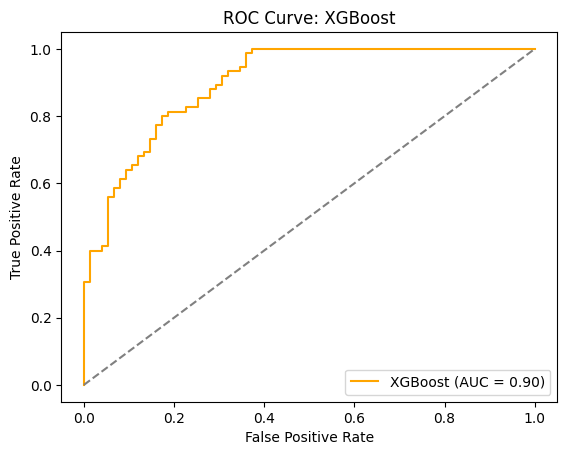

In [69]:
# XGBoost ROC Curve and AUC
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)

plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})', color='orange')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: XGBoost')
plt.legend(loc='lower right')
plt.show()

In [70]:
pred_counts_xgb = pd.Series(y_pred_xgb).value_counts()
labels = ['Non-Phishing', 'Phishing'] 
sizes = pred_counts_xgb.values
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)

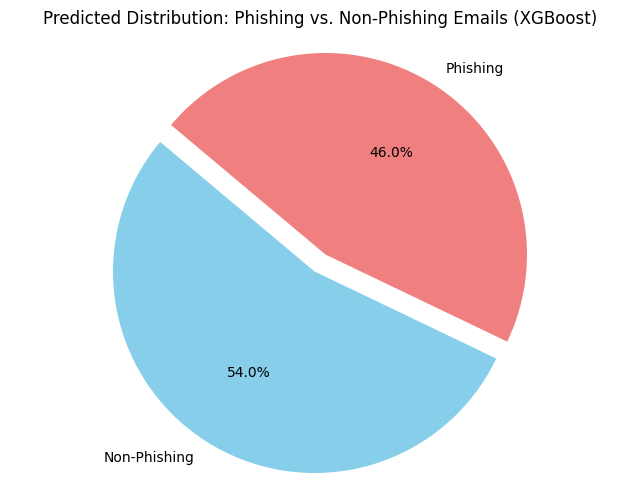

In [71]:
# Pie Chart Phishing v.s. Non-Phishing Distribution
plt.figure(figsize=(8, 6))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    explode=explode
)
plt.title('Predicted Distribution: Phishing vs. Non-Phishing Emails (XGBoost)')
plt.axis('equal')
plt.show()

In [ ]:
    print("Result from Random Forest")
    print(classification_report_rf)
    print(f"Random Forest Error Rate: {error_rate_rf:.2f}")
    print(f"AUC: {roc_auc:.2f}")
    print(f"Log Loss: {log_loss_value:.2f}")
    print(conf_matrix_rf)

    print()

    print("Result from Logistic Regression")
    print(classification_report_lr)
    print(f"Logistic Regression Error Rate: {error_rate_logreg:.2f}")
    print(f"AUC: {roc_auc_logreg:.2f}")
    print(f"Log Loss: {log_loss_value_logreg:.2f}")
    print(conf_matrix_lr)

    print()

    print("Result from SVC")
    print(classification_report(y_test, y_pred_svm))

In [72]:
# XGBoost Matthews Correlation Coefficient (MCC)
mcc_xgb = matthews_corrcoef(y_test, y_pred_xgb)
print(f"Matthews Correlation Coefficient (MCC): {mcc_xgb:.2f}")

Matthews Correlation Coefficient (MCC): 0.58


In [73]:
# XGBoost Log Loss
log_loss_value_xgb = log_loss(y_test, y_pred_proba_xgb)
print(f"Log Loss: {log_loss_value_xgb:.2f}")

Log Loss: 0.42


**6. Test the prototype on 50 emails, documenting major issues and errors.**

We're going for a smaller set to look for errors when testing so we can further see if we need to clean data.
1. Subset 50 Emails
2. Test on 4 Models Looking At Main Metrics
3. Analyze Misclassified Emails and Take Notes on Patterns
4. Look at Misclassified Emails Text Lengths and Take Notes on Patterns
5. Look at Misclassified Emails Features and Take Notes on Patterns

NOTE: Changing up style to include metrics, then charts for organizational purposes. Also adding a summary table.

In [74]:
# Subset of 50 Emails
X_test_subset = X_test.sample(n=50, random_state=42)
y_test_subset = y_test.loc[X_test_subset.index]

In [ ]:
subset_df = pd.DataFrame({
    "Email Text": X_test_subset,
    "True Label": y_test_subset
}).reset_index(drop=True)


print(subset_df.head(10))

                                          Email Text  True Label
0  erc financing regards existing deal setup cost...           0
1  jeannie gustafson jeannieenglewoodbankcom dont...           1
2  clal 1 abdul one time discount order vl gra cl...           1
3  young gould duncanfantasistbray50statescom tha...           1
4  ponderosa pine energy plant start fyi ponderos...           0
5  andrew silver andrewsilvervirgilioit 314 presl...           1
6  chance prizes regis kelly give away bait excel...           1
7  red rock expansion suggested general format so...           0
8  v g r generic cialis regalis cheap prices plac...           1
9  eastrans nomination change effective 9 23 00 p...           0


In [76]:
subset_indices = np.random.choice(range(X_test_tfidf.shape[0]), size=50, replace=False)
X_test_subset_tfidf = X_test_tfidf[subset_indices]
y_test_subset = y_test.iloc[subset_indices]

**1. RANDOM FOREST (50 Test) - Accuracy is 80-94%, Fluctuates a Lot More Than The Other Models**

In [77]:
# 1. Random Forest
y_pred_rf_subset = rf_model.predict(X_test_subset_tfidf)
y_pred_proba_rf_subset = rf_model.predict_proba(X_test_subset_tfidf)[:, 1]

In [78]:
accuracy_rf_subset = accuracy_score(y_test_subset, y_pred_rf_subset)
errors_rf_subset = (y_pred_rf_subset != y_test_subset).sum()
mcc_rf_subset = matthews_corrcoef(y_test_subset, y_pred_rf_subset)
log_loss_rf_subset = log_loss(y_test_subset, y_pred_proba_rf_subset)
roc_auc_rf_subset = roc_auc_score(y_test_subset, y_pred_proba_rf_subset)
conf_matrix_rf_subset = confusion_matrix(y_test_subset, y_pred_rf_subset)

In [79]:
print("Random Forest on Subset Evaluation:")
print(f"  Accuracy: {accuracy_rf_subset:.2f}")
print(f"  Errors: {errors_rf_subset}")
print(f"  MCC: {mcc_rf_subset:.2f}")
print(f"  Log Loss: {log_loss_rf_subset:.2f}")
print(f"  AUC: {roc_auc_rf_subset:.2f}")
print(f"  Confusion Matrix:\n{conf_matrix_rf_subset}")

Random Forest on Subset Evaluation:
  Accuracy: 0.82
  Errors: 9
  MCC: 0.66
  Log Loss: 0.42
  AUC: 0.93
  Confusion Matrix:
[[22  7]
 [ 2 19]]


In [80]:
print(f"Shape of X_test_subset: {X_test_subset.shape}")
print(f"Length of y_test_subset: {len(y_test_subset)}")
print(f"Predicted Label: {len(y_pred_rf_subset)}")
print(len(X_test))

Shape of X_test_subset: (50,)
Length of y_test_subset: 50
Predicted Label: 50
150


**Looking at Misclassified Emails**

In [81]:
X_test_subset_reset = X_test_subset.reset_index(drop=True)
y_test_subset_reset = y_test_subset.reset_index(drop=True)
y_pred_rf_subset_reset = pd.Series(y_pred_rf_subset).reset_index(drop=True)

In [82]:
misclassified_rf_subset = pd.DataFrame({
    "Email Text": X_test_subset_reset,
    "True Label": y_test_subset_reset,
    "Predicted Label": y_pred_rf_subset_reset
})

In [83]:
misclassified_rf_subset = misclassified_rf_subset[misclassified_rf_subset["True Label"] != misclassified_rf_subset["Predicted Label"]]
print("\nMisclassified Emails (Random Forest):")
print(misclassified_rf_subset)


Misclassified Emails (Random Forest):
                                           Email Text  True Label  \
1   jeannie gustafson jeannieenglewoodbankcom dont...           0   
5   andrew silver andrewsilvervirgilioit 314 presl...           1   
25  walter finn walterjuforumde touch deepest feel...           0   
26  gil erwin dwtradehammtradehamnet penis patch t...           0   
30  efren jarvis aldenhypochlorousvalenzuelalostpe...           0   
35  nicholas clark suqhccl4org thu oct 18 2007 052...           0   
39  6 1094 qs phonemicity writing stimulated richa...           0   
40  david andersson wdcscfvypgmailcom hello list p...           1   
43  online approval 5000 sincerely new offers staf...           0   

    Predicted Label  
1                 1  
5                 0  
25                1  
26                1  
30                1  
35                1  
39                1  
40                0  
43                1  


**Analysis Notes**

False Positives
- Row 12 ("sandra hartley") contains phishing-like terms ex. replica, classics, and tag heur, which are indicative of spam/phishing but not actually phishing.
- Row 46 ("luv ro lex"): lowprices goods and links sound like phishing attempts, but aren't

False Negatives

- Row 24 ("baylor enron case study") tone is professional and the words don't sound like phishing (only enron and names)
- Row 28 ("texas linguistics society"): Includes academic language, probably confuses model

**Time to Analyze Features For Further Breakdown**

In [84]:
misclassified_rf_subset['Text Length'] = misclassified_rf_subset['Email Text'].apply(len)
print(misclassified_rf_subset[['Text Length', 'True Label', 'Predicted Label']])

    Text Length  True Label  Predicted Label
1           278           0                1
5           852           1                0
25          319           0                1
26          139           0                1
30          372           0                1
35         1212           0                1
39         1030           0                1
40          550           1                0
43           54           0                1


In [85]:
# i'm grabbing the longest and shortest lengths to further inspect the emails
longest_email = misclassified_rf_subset.loc[misclassified_rf_subset['Text Length'].idxmax()]
shortest_email = misclassified_rf_subset.loc[misclassified_rf_subset['Text Length'].idxmin()]

In [86]:
# Longest 
print("Longest Email:")
print(f"Text Length: {longest_email['Text Length']}")
print(f"True Label: {longest_email['True Label']}")
print(f"Predicted Label: {longest_email['Predicted Label']}")
print(f"Email Text:\n{longest_email['Email Text']}")

Longest Email:
Text Length: 1212
True Label: 0
Predicted Label: 1
Email Text:
nicholas clark suqhccl4org thu oct 18 2007 052936am 0200 andreas j koenig wrote wed 17 oct 2007 110218 0200 mark overmeer said code fails ran cpantesters many many systems without problems 56 58 fails 510595 according cpantesters results httpcpantestersperlorgshowmailboxhtml looks like something broke 592 595 binary search reveals test fails since 25986 change 25986 nicholasnicholassaigo 20051104 130242 ftrwrite ftrexec fteread ftewrite fteexec merged perl_pp_ftrread mmm im sure script starts failing 581 cat 46463 usrlocalbinperl5100 use filetest access etc w etcpasswd warn f _ filen directoryn warn _ directoryn filen reference580binperl580 46463 file file reference581binperl581 46463 directory directory reference582binperl582 46463 directory directory reference583binperl583 46463 directory directory reference584binperl584 46463 directory directory reference585binperl585 46463 directory directory reference586

In [87]:
# Shortest
print("Shortest Email:")
print(f"Text Length: {shortest_email['Text Length']}")
print(f"True Label: {shortest_email['True Label']}")
print(f"Predicted Label: {shortest_email['Predicted Label']}")
print(f"Email Text:\n{shortest_email['Email Text']}")

Shortest Email:
Text Length: 54
True Label: 0
Predicted Label: 1
Email Text:
online approval 5000 sincerely new offers staff remove


**Text Length Analysis Notes**
- Short Emails (Row 36, Text Length = 190), has neutral phrases like "thanks for letting me know", confuses model due to short length
- Long Emails (Row 28, Text Length = 2128), with academic/complex language like "conference announcements" and "researchers", everything is pretty coherent and there aren't any suspicious words

In [88]:
false_positives = misclassified_rf_subset[(misclassified_rf_subset['True Label'] == 0) & (misclassified_rf_subset['Predicted Label'] == 1)]
false_negatives = misclassified_rf_subset[(misclassified_rf_subset['True Label'] == 1) & (misclassified_rf_subset['Predicted Label'] == 0)]

In [89]:
if not false_positives.empty:
    vectorizer_fp = CountVectorizer(stop_words='english')
    X_fp = vectorizer_fp.fit_transform(false_positives["Email Text"])
    word_freq_fp = dict(zip(vectorizer_fp.get_feature_names_out(), X_fp.sum(axis=0).A1))
    sorted_word_freq_fp_rf = sorted(word_freq_fp.items(), key=lambda x: x[1], reverse=True)

In [90]:
if not false_negatives.empty:
    vectorizer_fn = CountVectorizer(stop_words='english')
    X_fn = vectorizer_fn.fit_transform(false_negatives["Email Text"])
    word_freq_fn = dict(zip(vectorizer_fn.get_feature_names_out(), X_fn.sum(axis=0).A1))
    sorted_word_freq_fn_rf = sorted(word_freq_fn.items(), key=lambda x: x[1], reverse=True)

In [91]:
# False Negative Top Terms
if not false_negatives.empty:
    print("Top Terms in False Negatives (Random Forest, Ranked):")
    for rank, (word, freq) in enumerate(sorted_word_freq_fn_rf[:10], start=1):
        print(f"{rank}. {word}: {freq}")
else:
    print("No false negatives for Random Forest.")

Top Terms in False Negatives (Random Forest, Ranked):
1. andrew: 3
2. users: 3
3. 0100: 2
4. add: 2
5. alaska: 2
6. authenticated: 2
7. best: 2
8. crash: 2
9. dr: 2
10. internet: 2


In [92]:
# False Positive Top Terms
if not false_positives.empty:
    print("Top Terms in False Positives (Random Forest, Ranked):")
    for rank, (word, freq) in enumerate(sorted_word_freq_fp_rf[:10], start=1):
        print(f"{rank}. {word}: {freq}")
else:
    print("No false positives for Random Forest.")

Top Terms in False Positives (Random Forest, Ranked):
1. directory: 18
2. 46463: 11
3. wed: 6
4. 06: 5
5. 2008: 5
6. aug: 5
7. love: 4
8. 0200: 3
9. fails: 3
10. orthography: 3


**Notes**
- Numbers Confuse the Model
- directory, replica, classics falsely flagged as phishing
- structure, argument, abstracts, conference, university falsely not flagged as phishing
- try to analyze contexts of words better
- legitimate and phishing emails share overlapping vocabulary

**Suggested Improvements**
- try TF-IDF weights with stricter thresholds
- Exclude features with very high document frequencies (max_df).
- Include features with low document frequencies (min_df)
- maybe try word embeddings like Word2Vec, GloVe, BERT
- Get Rid of Numbers For Model Improvements
- retrain misclassified samples

**2. LOGISTIC REGRESSION (50 Test) - Accuracy is 94%**

In [93]:
# 2. Logistic Regression
y_pred_logreg_subset = logreg_model.predict(X_test_subset_tfidf)
y_pred_proba_logreg_subset = logreg_model.predict_proba(X_test_subset_tfidf)[:, 1]

In [94]:
accuracy_logreg_subset = accuracy_score(y_test_subset, y_pred_logreg_subset)
errors_logreg_subset = (y_pred_logreg_subset != y_test_subset).sum()
mcc_logreg_subset = matthews_corrcoef(y_test_subset, y_pred_logreg_subset)
log_loss_logreg_subset = log_loss(y_test_subset, y_pred_proba_logreg_subset)
roc_auc_logreg_subset = roc_auc_score(y_test_subset, y_pred_proba_logreg_subset)
conf_matrix_logreg_subset = confusion_matrix(y_test_subset, y_pred_logreg_subset)

In [95]:
print("Logistic Regression on Subset Evaluation:")
print(f"  Accuracy: {accuracy_logreg_subset:.2f}")
print(f"  Errors: {errors_logreg_subset}")
print(f"  MCC: {mcc_logreg_subset:.2f}")
print(f"  Log Loss: {log_loss_logreg_subset:.2f}")
print(f"  AUC: {roc_auc_logreg_subset:.2f}")
print(f"  Confusion Matrix:\n{conf_matrix_logreg_subset}")

Logistic Regression on Subset Evaluation:
  Accuracy: 0.94
  Errors: 3
  MCC: 0.88
  Log Loss: 0.17
  AUC: 0.98
  Confusion Matrix:
[[27  2]
 [ 1 20]]


In [96]:
#ignore this, need for debugging
print(f"Shape of X_test_subset: {X_test_subset.shape}")
print(f"Length of y_test_subset: {len(y_test_subset_reset)}")
print(f"Predicted Label: {len(y_pred_logreg_subset)}")
print(len(X_test))

Shape of X_test_subset: (50,)
Length of y_test_subset: 50
Predicted Label: 50
150


**Looking at Misclassified Emails**

In [97]:
X_test_subset_reset = X_test_subset.reset_index(drop=True)
y_test_subset_reset = y_test_subset.reset_index(drop=True)
y_pred_logreg_subset_reset = pd.Series(y_pred_logreg_subset).reset_index(drop=True)

In [98]:
misclassified_logreg_subset = pd.DataFrame({
    "Email Text": X_test_subset_reset,
    "True Label": y_test_subset_reset,
    "Predicted Label": y_pred_logreg_subset_reset
})

In [99]:
misclassified_logreg_subset = misclassified_logreg_subset[
    misclassified_logreg_subset["True Label"] != misclassified_logreg_subset["Predicted Label"]
]

pd.set_option('display.max_colwidth', None)
print("\nMisclassified Emails (Logistic Regression):")
print(misclassified_logreg_subset)


Misclassified Emails (Logistic Regression):
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

**Analysis Notes**

- Misspelled words trigger a phishing prediction (ex. "sheee wiiiiill saay loooooong hi kirk dooooooon getteeed buuuuurneed geeeet in row 23")
- Weird that the word "help" in row 34 didn't trigger phishing

**Time to Analyze Features For Further Breakdown**

In [100]:
misclassified_logreg_subset['Text Length'] = misclassified_logreg_subset['Email Text'].apply(len)
print(misclassified_logreg_subset[['Text Length', 'True Label', 'Predicted Label']])

    Text Length  True Label  Predicted Label
14         1336           1                0
30          372           0                1
44          193           0                1


In [101]:
# i'm grabbing the longest and shortest lengths to further inspect the emails
longest_email_logreg = misclassified_logreg_subset.loc[misclassified_logreg_subset['Text Length'].idxmax()]
shortest_email_logreg = misclassified_logreg_subset.loc[misclassified_logreg_subset['Text Length'].idxmin()]

In [102]:
# Longest 
print("Longest Email (Logistic Regression):")
print(f"Text Length: {longest_email_logreg['Text Length']}")
print(f"True Label: {longest_email_logreg['True Label']}")
print(f"Predicted Label: {longest_email_logreg['Predicted Label']}")
print(f"Email Text:\n{longest_email_logreg['Email Text']}")

Longest Email (Logistic Regression):
Text Length: 1336
True Label: 1
Predicted Label: 0
Email Text:
wall meredith meredithwallspartanburg2k12scus guidelines validating employee pays validate payroll 015367 june cycle please click epay review payroll certification information payroll certification information viewed epay menu item employee data management payroll results certify payroll logged onto epay summary pay results tab check employees receiving correct payments including allowances click note pad icon view employees allowances deductions note access view deductions available managers assistance department interactive help programs guides assist certification process running reports managing employee leave system generated email please reply email guidelines validating employee pays validate payroll 015367 june cycle please click epay review payroll certification information payroll certification information viewed epay menu item employee data management payroll results certify p

In [103]:
# Shortest 
print("Shortest Email (Logistic Regression):")
print(f"Text Length: {shortest_email_logreg['Text Length']}")
print(f"True Label: {shortest_email_logreg['True Label']}")
print(f"Predicted Label: {shortest_email_logreg['Predicted Label']}")
print(f"Email Text:\n{shortest_email_logreg['Email Text']}")

Shortest Email (Logistic Regression):
Text Length: 193
True Label: 0
Predicted Label: 1
Email Text:
96 refinance 2 9 hi would reflnance knew save thousands get lnterest low 2 98 believe fill small online questionaire show get house car always wanted takes 2 minutes time http www bralamone com


**Text Length Analysis Notes**

In [104]:
false_positives_logreg = misclassified_logreg_subset[
    (misclassified_logreg_subset['True Label'] == 0) & (misclassified_logreg_subset['Predicted Label'] == 1)
]
false_negatives_logreg = misclassified_logreg_subset[
    (misclassified_logreg_subset['True Label'] == 1) & (misclassified_logreg_subset['Predicted Label'] == 0)
]

In [105]:
if not false_positives_logreg.empty:
    vectorizer_fp_logreg = CountVectorizer(stop_words='english')
    X_fp_logreg = vectorizer_fp_logreg.fit_transform(false_positives_logreg["Email Text"])
    word_freq_fp_logreg = dict(zip(vectorizer_fp_logreg.get_feature_names_out(), X_fp_logreg.sum(axis=0).A1))
    sorted_word_freq_fp_logreg = sorted(word_freq_fp_logreg.items(), key=lambda x: x[1], reverse=True)

In [106]:
if not false_negatives_logreg.empty:
    vectorizer_fn_logreg = CountVectorizer(stop_words='english')
    X_fn_logreg = vectorizer_fn_logreg.fit_transform(false_negatives_logreg["Email Text"])
    word_freq_fn_logreg = dict(zip(vectorizer_fn_logreg.get_feature_names_out(), X_fn_logreg.sum(axis=0).A1))
    sorted_word_freq_fn_logreg = sorted(word_freq_fn_logreg.items(), key=lambda x: x[1], reverse=True)

In [107]:
# False Positive Top Terms
if not false_positives_logreg.empty:
    print("Top Terms in False Positives (Logistic Regression, Ranked):")
    for rank, (word, freq) in enumerate(sorted_word_freq_fp_logreg[:10], start=1):
        print(f"{rank}. {word}: {freq}")
else:
    print("\nNo False Pos (Logistic Regression) to analyze.")

Top Terms in False Positives (Logistic Regression, Ranked):
1. believe: 2
2. short: 2
3. 06: 1
4. 0800: 1
5. 2008: 1
6. 230801: 1
7. 96: 1
8. 98: 1
9. aldenhypochlorousvalenzuelalostpediacom: 1
10. amazing: 1


In [108]:
# False Negative Top 
if not false_negatives_logreg.empty:
    print("\nTop Terms in False Negatives (Logistic Regression, Ranked):")
    for rank, (word, freq) in enumerate(sorted_word_freq_fn_logreg[:10], start=1):
        print(f"{rank}. {word}: {freq}")
else:
    print("\nNo False Negatives (Logistic Regression) to analyze.")


Top Terms in False Negatives (Logistic Regression, Ranked):
1. payroll: 11
2. certification: 6
3. employee: 6
4. epay: 6
5. allowances: 4
6. click: 4
7. deductions: 4
8. email: 4
9. employees: 4
10. information: 4


**Notes**
- could we get rid of "com" and try to see how that effects the model since it leads to false positives
- do vice versa for "customers" in false negatives
- it seems like most errors with the best models is caused due to lack of context for the overall message. ex. when "business" is used, it could be a dead giveaway for being a phishing email or not being a phishing email. we wouldn't know unless we take the whole email into consideration instead of certain terms. maybe try BERT for this.

**3. SVM (50 Test) - 94% Accuracy**

In [109]:
# 3. SVM
y_pred_svm_subset = svm_model.predict(X_test_subset_tfidf)
y_pred_proba_svm_subset = svm_model.predict_proba(X_test_subset_tfidf)[:, 1]

In [110]:
accuracy_svm_subset = accuracy_score(y_test_subset, y_pred_svm_subset)
errors_svm_subset = (y_pred_svm_subset != y_test_subset).sum()
mcc_svm_subset = matthews_corrcoef(y_test_subset, y_pred_svm_subset)
log_loss_svm_subset = log_loss(y_test_subset, y_pred_proba_svm_subset)
roc_auc_svm_subset = roc_auc_score(y_test_subset, y_pred_proba_svm_subset)
conf_matrix_svm_subset = confusion_matrix(y_test_subset, y_pred_svm_subset)

In [111]:
print("\n SVM on Subset Evaluation:")
print(f"  Accuracy: {accuracy_svm_subset:.2f}")
print(f"  Errors: {errors_svm_subset}")
print(f"  MCC: {mcc_svm_subset:.2f}")
print(f"  Log Loss: {log_loss_svm_subset:.2f}")
print(f"  AUC: {roc_auc_svm_subset:.2f}")
print(f"  Confusion Matrix:\n{conf_matrix_svm_subset}")


 SVM on Subset Evaluation:
  Accuracy: 0.94
  Errors: 3
  MCC: 0.88
  Log Loss: 0.17
  AUC: 0.98
  Confusion Matrix:
[[27  2]
 [ 1 20]]


In [112]:
#ignore this, need for debugging
print(f"Shape of X_test_subset: {X_test_subset.shape}")
print(f"Length of y_test_subset: {len(y_test_subset)}")
print(f"Predicted Label: {len(y_pred_svm_subset)}")
print(len(X_test))

Shape of X_test_subset: (50,)
Length of y_test_subset: 50
Predicted Label: 50
150


**Looking at Misclassified Emails**

In [113]:
X_test_subset_reset = X_test_subset.reset_index(drop=True)
y_test_subset_reset = y_test_subset.reset_index(drop=True)
y_pred_svm_subset_reset = pd.Series(y_pred_svm_subset).reset_index(drop=True)

In [114]:
misclassified_svm_subset = pd.DataFrame({
    "Email Text": X_test_subset_reset,
    "True Label": y_test_subset_reset,
    "Predicted Label": y_pred_svm_subset_reset
})

In [115]:
misclassified_svm_subset = misclassified_svm_subset[misclassified_svm_subset["True Label"] != misclassified_svm_subset["Predicted Label"]]
pd.set_option('display.max_colwidth', None)
print("\nMisclassified Emails (SVM):")
print(misclassified_svm_subset)


Misclassified Emails (SVM):
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

**Analysis Notes**
- getting almost the same results for svm as logistic regression

Longest Misclassified Email: 
-  verbose, nonsensical, spam-like email. probably getting flagged due to noise and structure.
  
Shortest Misclassified Email: 
- concise, professional-sounding legit email. issue is that it mimics some structural traits of spam.

**Time to Analyze Features For Further Breakdown**

In [116]:
misclassified_svm_subset['Text Length'] = misclassified_svm_subset['Email Text'].apply(len)
print(misclassified_svm_subset[['Text Length', 'True Label', 'Predicted Label']])

    Text Length  True Label  Predicted Label
14         1336           1                0
30          372           0                1
44          193           0                1


In [117]:
# i'm grabbing the longest and shortest lengths to further inspect the emails
longest_email_svm = misclassified_svm_subset.loc[misclassified_svm_subset['Text Length'].idxmax()]
shortest_email_svm = misclassified_svm_subset.loc[misclassified_svm_subset['Text Length'].idxmin()]

In [118]:
# Longest
print("\nLongest Misclassified Email (SVM):")
print(f"Text Length: {longest_email_svm['Text Length']}")
print(f"True Label: {longest_email_svm['True Label']}")
print(f"Predicted Label: {longest_email_svm['Predicted Label']}")
print(f"Email Text:\n{longest_email_svm['Email Text']}")


Longest Misclassified Email (SVM):
Text Length: 1336
True Label: 1
Predicted Label: 0
Email Text:
wall meredith meredithwallspartanburg2k12scus guidelines validating employee pays validate payroll 015367 june cycle please click epay review payroll certification information payroll certification information viewed epay menu item employee data management payroll results certify payroll logged onto epay summary pay results tab check employees receiving correct payments including allowances click note pad icon view employees allowances deductions note access view deductions available managers assistance department interactive help programs guides assist certification process running reports managing employee leave system generated email please reply email guidelines validating employee pays validate payroll 015367 june cycle please click epay review payroll certification information payroll certification information viewed epay menu item employee data management payroll results certify pa

In [119]:
# Shortest
print("\nShortest Misclassified Email (SVM):")
print(f"Text Length: {shortest_email_svm['Text Length']}")
print(f"True Label: {shortest_email_svm['True Label']}")
print(f"Predicted Label: {shortest_email_svm['Predicted Label']}")
print(f"Email Text:\n{shortest_email_svm['Email Text']}")


Shortest Misclassified Email (SVM):
Text Length: 193
True Label: 0
Predicted Label: 1
Email Text:
96 refinance 2 9 hi would reflnance knew save thousands get lnterest low 2 98 believe fill small online questionaire show get house car always wanted takes 2 minutes time http www bralamone com


**Text Length Analysis Notes**

In [120]:
false_positives_svm = misclassified_svm_subset[
    (misclassified_svm_subset['True Label'] == 0) & (misclassified_svm_subset['Predicted Label'] == 1)
]
false_negatives_svm = misclassified_svm_subset[
    (misclassified_svm_subset['True Label'] == 1) & (misclassified_svm_subset['Predicted Label'] == 0)
]

In [121]:
if not false_positives_svm.empty:
    vectorizer_fp_svm = CountVectorizer(stop_words='english')
    X_fp_svm = vectorizer_fp_svm.fit_transform(false_positives_svm["Email Text"])
    word_freq_fp_svm = dict(zip(vectorizer_fp_svm.get_feature_names_out(), X_fp_svm.sum(axis=0).A1))
    sorted_word_freq_fp_svm = sorted(word_freq_fp_svm.items(), key=lambda x: x[1], reverse=True)

In [122]:
if not false_negatives_svm.empty:
    vectorizer_fn_svm = CountVectorizer(stop_words='english')
    X_fn_svm = vectorizer_fn_svm.fit_transform(false_negatives_svm["Email Text"])
    word_freq_fn_svm = dict(zip(vectorizer_fn_svm.get_feature_names_out(), X_fn_svm.sum(axis=0).A1))
    sorted_word_freq_fn_svm = sorted(word_freq_fn_svm.items(), key=lambda x: x[1], reverse=True)

In [123]:
# False Positive Top Terms
if not false_positives_svm.empty:
    print("\nTop Terms in False Positives (SVM, Ranked):")
    for rank, (word, freq) in enumerate(sorted_word_freq_fp_svm[:10], start=1):
        print(f"{rank}. {word}: {freq}")
else:
    print("\nNo False Positives Found for SVM.")


Top Terms in False Positives (SVM, Ranked):
1. believe: 2
2. short: 2
3. 06: 1
4. 0800: 1
5. 2008: 1
6. 230801: 1
7. 96: 1
8. 98: 1
9. aldenhypochlorousvalenzuelalostpediacom: 1
10. amazing: 1


In [124]:
# False Negative Top Terms
if not false_negatives_svm.empty:
    print("\nTop Terms in False Negatives (SVM, Ranked):")
    for rank, (word, freq) in enumerate(sorted_word_freq_fn_svm[:10], start=1):
        print(f"{rank}. {word}: {freq}")
else:
    print("\nNo False Negatives Found for SVM.")


Top Terms in False Negatives (SVM, Ranked):
1. payroll: 11
2. certification: 6
3. employee: 6
4. epay: 6
5. allowances: 4
6. click: 4
7. deductions: 4
8. email: 4
9. employees: 4
10. information: 4


False Positives: 
- Misclassified legitimate emails often contain frequent professional or advertisement-like terms.
  
False Negatives: 
- Missed spam emails are brief and appear legitimate due to professional language.

**4. XGBOOST (50 Test)**

In [125]:
# 4. XGBoost
y_pred_xgb_subset = xgb_model.predict(X_test_subset_tfidf)
y_pred_proba_xgb_subset = xgb_model.predict_proba(X_test_subset_tfidf)[:, 1]

In [126]:
accuracy_xgb_subset = accuracy_score(y_test_subset, y_pred_xgb_subset)
errors_xgb_subset = (y_pred_xgb_subset != y_test_subset).sum()
mcc_xgb_subset = matthews_corrcoef(y_test_subset, y_pred_xgb_subset)
log_loss_xgb_subset = log_loss(y_test_subset, y_pred_proba_xgb_subset)
roc_auc_xgb_subset = roc_auc_score(y_test_subset, y_pred_proba_xgb_subset)
conf_matrix_xgb_subset = confusion_matrix(y_test_subset, y_pred_xgb_subset)

In [127]:
print("XGBoost on Subset Evaluation:")
print(f"  Accuracy: {accuracy_xgb_subset:.2f}")
print(f"  Errors: {errors_xgb_subset}")
print(f"  MCC: {mcc_xgb_subset:.2f}")
print(f"  Log Loss: {log_loss_xgb_subset:.2f}")
print(f"  AUC: {roc_auc_xgb_subset:.2f}")
print(f"  Confusion Matrix:\n{conf_matrix_xgb_subset}")

XGBoost on Subset Evaluation:
  Accuracy: 0.78
  Errors: 11
  MCC: 0.55
  Log Loss: 0.46
  AUC: 0.90
  Confusion Matrix:
[[23  6]
 [ 5 16]]


In [128]:
print(f"Shape of X_test_subset: {X_test_subset.shape}")
print(f"Length of y_test_subset: {len(y_test_subset)}")
print(f"Predicted Label: {len(y_pred_rf_subset)}")
print(len(X_test))

Shape of X_test_subset: (50,)
Length of y_test_subset: 50
Predicted Label: 50
150


**Looking at Misclassified Emails**

In [129]:
X_test_subset_reset = X_test_subset.reset_index(drop=True)
y_test_subset_reset = y_test_subset.reset_index(drop=True)
y_pred_xgb_subset_reset = pd.Series(y_pred_xgb_subset).reset_index(drop=True)

In [130]:
misclassified_xgb_subset = pd.DataFrame({
    "Email Text": X_test_subset_reset,
    "True Label": y_test_subset_reset,
    "Predicted Label": y_pred_xgb_subset_reset
})

In [131]:
misclassified_xgb_subset = misclassified_xgb_subset[
    misclassified_xgb_subset["True Label"] != misclassified_xgb_subset["Predicted Label"]
]
pd.set_option('display.max_colwidth', None)
print("\nMisclassified Emails (XGBoost):")
print(misclassified_xgb_subset)


Misclassified Emails (XGBoost):
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

**Time to Analyze Features For Further Breakdown**

In [132]:
misclassified_xgb_subset['Text Length'] = misclassified_xgb_subset['Email Text'].apply(len)
print(misclassified_xgb_subset[['Text Length', 'True Label', 'Predicted Label']])

    Text Length  True Label  Predicted Label
1           278           0                1
5           852           1                0
11         1172           1                0
14         1336           1                0
17          387           1                0
29          608           0                1
30          372           0                1
35         1212           0                1
36          190           0                1
38         1058           1                0
43           54           0                1


In [133]:
longest_email_xgb = misclassified_xgb_subset.loc[misclassified_xgb_subset['Text Length'].idxmax()]
shortest_email_xgb = misclassified_xgb_subset.loc[misclassified_xgb_subset['Text Length'].idxmin()]

In [134]:
# Longest 
print("Longest Email:")
print(f"Text Length: {longest_email_xgb['Text Length']}")
print(f"True Label: {longest_email_xgb['True Label']}")
print(f"Predicted Label: {longest_email_xgb['Predicted Label']}")
print(f"Email Text:\n{longest_email_xgb['Email Text']}")

Longest Email:
Text Length: 1336
True Label: 1
Predicted Label: 0
Email Text:
wall meredith meredithwallspartanburg2k12scus guidelines validating employee pays validate payroll 015367 june cycle please click epay review payroll certification information payroll certification information viewed epay menu item employee data management payroll results certify payroll logged onto epay summary pay results tab check employees receiving correct payments including allowances click note pad icon view employees allowances deductions note access view deductions available managers assistance department interactive help programs guides assist certification process running reports managing employee leave system generated email please reply email guidelines validating employee pays validate payroll 015367 june cycle please click epay review payroll certification information payroll certification information viewed epay menu item employee data management payroll results certify payroll logged onto epa

In [135]:
# Shortest
print("Shortest Email:")
print(f"Text Length: {shortest_email_xgb['Text Length']}")
print(f"True Label: {shortest_email_xgb['True Label']}")
print(f"Predicted Label: {shortest_email_xgb['Predicted Label']}")
print(f"Email Text:\n{shortest_email_xgb['Email Text']}")

Shortest Email:
Text Length: 54
True Label: 0
Predicted Label: 1
Email Text:
online approval 5000 sincerely new offers staff remove


**Text Length Analysis Notes**

False Positives:
- Top-ranked terms from emails mistakenly flagged as spam include "crude, documentation, experience, netco, operations", frequent terms related to professional contexts or corporate jargon.
- Patterns suggest that these emails are being misclassified because they mimic some structural or linguistic traits of spam (e.g., repetitive terms, unusual phrasing).
  
False Negatives:
- Top-ranked terms from spam emails missed as legitimate include: alert, alerts, cnn, custom, 2008 – common in structured alerts or notifications.
- These terms suggest that legitimate-looking formatting or professional-sounding content in spam emails may be confusing the model.

In [136]:
false_positives_xgb = misclassified_xgb_subset[
    (misclassified_xgb_subset['True Label'] == 0) & (misclassified_xgb_subset['Predicted Label'] == 1)
]
false_negatives_xgb = misclassified_xgb_subset[
    (misclassified_xgb_subset['True Label'] == 1) & (misclassified_xgb_subset['Predicted Label'] == 0)
]

In [137]:
if not false_positives_xgb.empty:
    vectorizer_fp_xgb = CountVectorizer(stop_words='english')
    X_fp_xgb = vectorizer_fp_xgb.fit_transform(false_positives_xgb["Email Text"])
    word_freq_fp_xgb = dict(zip(vectorizer_fp_xgb.get_feature_names_out(), X_fp_xgb.sum(axis=0).A1))
    sorted_word_freq_fp_xgb = sorted(word_freq_fp_xgb.items(), key=lambda x: x[1], reverse=True)

In [138]:
if not false_negatives_xgb.empty:
    vectorizer_fn_xgb = CountVectorizer(stop_words='english')
    X_fn_xgb = vectorizer_fn_xgb.fit_transform(false_negatives_xgb["Email Text"])
    word_freq_fn_xgb = dict(zip(vectorizer_fn_xgb.get_feature_names_out(), X_fn_xgb.sum(axis=0).A1))
    sorted_word_freq_fn_xgb = sorted(word_freq_fn_xgb.items(), key=lambda x: x[1], reverse=True)

In [139]:
# False Positives Top Terms
if not false_positives_xgb.empty:
    print("\nTop Terms in False Positives (XGBoost, Ranked):")
    for rank, (word, freq) in enumerate(sorted_word_freq_fp_xgb[:10], start=1):
        print(f"{rank}. {word}: {freq}")
else:
    print("\nNo False Positives Found for XGBoost.")


Top Terms in False Positives (XGBoost, Ranked):
1. directory: 18
2. 46463: 11
3. wed: 5
4. mbr: 4
5. 0200: 3
6. 06: 3
7. 2008: 3
8. application: 3
9. aug: 3
10. fails: 3


In [140]:
# False Negatives Top Terms
if not false_negatives_xgb.empty:
    print("\nTop Terms in False Negatives (XGBoost, Ranked):")
    for rank, (word, freq) in enumerate(sorted_word_freq_fn_xgb[:10], start=1):
        print(f"{rank}. {word}: {freq}")
else:
    print("\nNo False Negatives Found for XGBoost.")


Top Terms in False Negatives (XGBoost, Ranked):
1. payroll: 11
2. assistance: 6
3. certification: 6
4. dr: 6
5. email: 6
6. employee: 6
7. epay: 6
8. allowances: 4
9. business: 4
10. click: 4


Text Length Observations

- Longest Misclassified Email (2639 characters): A verbose spam email overloaded with irrelevant terms, likely contributing to misclassification due to noise.
- Shortest Misclassified Email (176 characters): A concise legitimate email flagged as spam, possibly due to its abrupt style resembling typical spam.

**WEEK 7**
**Improve model performance to reach 10% - 20%+ more accuracy than Sept 29th Week.** (This week's work is in a different Kaggle file)

Note: All models surpassed the 75%-85% accuracy mark during week 4 (a 10% to 20% increase from the 65% accuracy). Thus, as it's nearly impossible to have 100% accuracy, this week was focused on increasing accuracy as much as possible in each of the 4 models by finding the most optimal parameters. Then creating the most optimal model to run for Weeks 8 and 9 instead of running all 4 models.

What I did was:
1. Test all possible idf-tf parameters (testing all possible combinations in seperate notebooks) for all 4 models. 
2. Find the most ideal parameter combination based on performance. The order goes as followed 1. 'accuracy', 2. 'auc', 3. 'mcc', 4. 'logloss'. If multiple tie for accuracy, then we sort for the best auc. If accuracy and auc are tied, then we sort for best mcc. Etc.

After finding all optimal combos and seeing whether voting or stacking performs best, I combine the most optimal 4 models in the best classifier to create the most optimal model. The following 2 weeks will be tested on this combined model instead of 4 seperate models.

**Model 1 - Random Forest (Originally 83% Accuracy, Improved to 90% Accuracy)**
- Week 7 RF Model Notebook: https://www.kaggle.com/code/arianapinz/final-random-forest-phishing-week-7
- Tested 648 Runs

Best Parameters for Random Forest
- max_features /        5000
- max_df /               0.7
- min_df /                 2
- ngram_range /       (1, 1)
- n_estimators /          50
- max_depth /            NaN

Results

- accuracy 0.9
- auc 0.9624
- logloss 0.350897
- mcc 0.805823

**Model 2 - Logarithmic Regression (Originally 93% Accuracy, Improved to 94.667% Accuracy)**
- Week 7 LR Notebook: https://www.kaggle.com/code/arianapinz/final-logarithmic-regression-phishing-week-7
- 1080 runs (10 possible combos, (Subtract 220 Invalid Combos as the parameters 'lbfgs' and 'l1' can't be used together))

Best Parameters for Log Regression
- max_features /        10000
- max_df /                0.7
- min_df /                  1
- ngram_range /        (1, 1)
- C /                    10.0
- solver /          liblinear
- penalty /                l2

Results

- accuracy 0.946667
- auc 0.989511
- logloss 0.273688
- mcc 0.893651

**Model 3 - SVM (Originally 94% Accuracy, Improved to 94.67% Accuracy)**
- Week 7 SVM Notebook: https://www.kaggle.com/code/arianapinz/final-svm-phishing-week-7
- Tested 1728 Runs

Best Parameters for SVM
- max_features /       10000
- max_df /               0.7
- min_df /                 1
- ngram_range /       (1, 1)
- C /                   10.0
- kernel /           sigmoid
- gamma /              scale

Results
- accuracy        0.946667
- auc             0.989156
- logloss         0.136842
- mcc             0.893651

**Model 4 - XGBoost (Originally 79% Accuracy, Improved to 85% Accuracy)**

- Week 7 XGB Notebook: https://www.kaggle.com/code/arianapinz/final-xgboost-phishing-week-7
- Tested 1152 Runs

Best Parameters for XGBoost
- max_features            1000
- max_df                   0.7
- min_df                     5
- ngram_range           (1, 2)
- n_estimators              50
- max_depth                  6
- learning_rate            0.1
- colsample_bytree         0.7

Results
- accuracy            0.853333
- auc                 0.934756
- logloss             0.344038
- mcc                 0.710721

**8. Test on an additional 100 emails, documenting performance metrics (precision, recall, etc.).**

Here I am going to add an additional 100 emails to the data and then run the models on a Voting Classifier to Combine 4 Models.

**For the Data Science Requirement Portions I've also done 7.2 of Error distribution chart, Heatmap of error frequency and 8.2 of Precision, Recall, F1 Score bar chart for test results.**

Running a Voting Classifier with the Most Optimal Parameters from the 4 Models ...

**Voting Classifier Results**
- Accuracy: 0.9400
- AUC: 0.9820
- Log Loss: 0.2573
- MCC: 0.8801

**Metrics for Voting Classifier on Additional 100 Emails**

- Accuracy: 0.9500
- AUC: 0.9956
- Log Loss: 0.2072
- MCC: 0.9014

**Metrics for Stacking Classifier**

- Accuracy: 0.9333
- AUC: 0.9847
- Log Loss: 0.1693
- MCC: 0.8667

**Metrics for Stacking Classifier on Additional 100 Emails**

- Accuracy: 0.9500
- AUC: 0.9951
- Log Loss: 0.1097
- MCC: 0.9005

# Running Voting Classifier on 500

In [141]:
#RF Optimal Parameters
rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    random_state=42
)

In [142]:
#LR Optimal Parameters
lr_model = LogisticRegression(
    C=10.0,
    solver='liblinear',
    penalty='l2',
    random_state=42
)

In [143]:
# SVM Optimal Parameters
svm_model = SVC(
    C=10.0,
    kernel='sigmoid',
    gamma='scale',
    probability=True,
    random_state=42
)

In [144]:
# XGB Optimal Parameters
xgb_model = XGBClassifier(
    n_estimators=50,
    max_depth=6,
    learning_rate=0.1,
    colsample_bytree=0.7,
    random_state=42
)

In [145]:
# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('Random Forest', rf_model),
        ('Logistic Regression', lr_model),
        ('SVM', svm_model),
        ('XGBoost', xgb_model)
    ],
    voting='soft'  
)

In [146]:
# Size of 500
print("Size of Training Data (TF-IDF):", X_train_tfidf.shape)
print("Size of Testing Data (TF-IDF):", X_test_tfidf.shape)

Size of Training Data (TF-IDF): (350, 5000)
Size of Testing Data (TF-IDF): (150, 5000)


In [ ]:
voting_clf.fit(X_train_tfidf, y_train)
y_pred_voting = voting_clf.predict(X_test_tfidf)
y_pred_proba_voting = voting_clf.predict_proba(X_test_tfidf)[:, 1]

In [148]:
accuracy_voting = accuracy_score(y_test, y_pred_voting)
auc_voting = roc_auc_score(y_test, y_pred_proba_voting)
logloss_voting = log_loss(y_test, y_pred_proba_voting)
mcc_voting = matthews_corrcoef(y_test, y_pred_voting)

In [149]:
report_voting = classification_report(y_test, y_pred_voting)

In [150]:
print("Metrics for Voting Classifier:")
print(f"Accuracy: {accuracy_voting:.4f}")
print(f"AUC: {auc_voting:.4f}")
print(f"Log Loss: {logloss_voting:.4f}")
print(f"MCC: {mcc_voting:.4f}\n")
print("Classification Report:")
print(report_voting)

Metrics for Voting Classifier:
Accuracy: 0.9400
AUC: 0.9820
Log Loss: 0.2573
MCC: 0.8801

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        75
           1       0.93      0.95      0.94        75

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



# Running Voting Classifier on 600

Adding the Additional 100 Test Emails ..

In [151]:
X_additional = df['text_combined'].sample(n=100, random_state=42, replace=False)
y_additional = df.loc[X_additional.index, 'label']

In [152]:
# 500 Original Dataset
print("Original Training Size:", X_train.shape)
print("Original Test Size:", X_test.shape)
print("Additional Data Size:", X_additional.shape)

Original Training Size: (350,)
Original Test Size: (150,)
Additional Data Size: (100,)


In [153]:
# 600 Combined
X_combined = pd.concat([X_train, X_test, X_additional], ignore_index=True)
y_combined = pd.concat([y_train, y_test, y_additional], ignore_index=True)
print("Combined Data Size (Raw):", X_combined.shape)
print("Combined Label Size:", y_combined.shape)

Combined Data Size (Raw): (600,)
Combined Label Size: (600,)


In [154]:
# Fit
X_combined_tfidf = tfidf.fit_transform(X_combined)
print("Total Data Size (TF-IDF):", X_combined_tfidf.shape)
print("Total Label Size:", y_combined.shape)

Total Data Size (TF-IDF): (600, 5000)
Total Label Size: (600,)


In [155]:
# 60 Split (70/30 Training and Testing Size)
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(
    X_combined_tfidf, y_combined, test_size=0.3, random_state=42, stratify=y_combined
)
print("New Training Size:", X_train_total.shape)
print("New Test Size:", X_test_total.shape)

New Training Size: (420, 5000)
New Test Size: (180, 5000)


In [156]:
# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('Random Forest', rf_model),
        ('Logistic Regression', lr_model),
        ('SVM', svm_model),
        ('XGBoost', xgb_model)
    ],
    voting='soft'  
)

voting_clf.fit(X_train_total, y_train_total)
y_pred_voting_total = voting_clf.predict(X_test_total)
y_pred_proba_voting_total = voting_clf.predict_proba(X_test_total)[:, 1]

In [157]:
accuracy_voting_total = accuracy_score(y_test_total, y_pred_voting_total)
auc_voting_total = roc_auc_score(y_test_total, y_pred_proba_voting_total)
logloss_voting_total = log_loss(y_test_total, y_pred_proba_voting_total)
mcc_voting_total = matthews_corrcoef(y_test_total, y_pred_voting_total)
report_voting_total = classification_report(y_test_total, y_pred_voting_total)

In [158]:
print("Metrics for Voting Classifier on Combined Data:")
print(f"Accuracy: {accuracy_voting_total:.4f}")
print(f"AUC: {auc_voting_total:.4f}")
print(f"Log Loss: {logloss_voting_total:.4f}")
print(f"MCC: {mcc_voting_total:.4f}\n")
print("Classification Report:")
print(report_voting_total)

Metrics for Voting Classifier on Combined Data:
Accuracy: 0.9222
AUC: 0.9915
Log Loss: 0.2400
MCC: 0.8452

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        89
           1       0.91      0.95      0.92        91

    accuracy                           0.92       180
   macro avg       0.92      0.92      0.92       180
weighted avg       0.92      0.92      0.92       180



**7.2 ERROR DISTRIBUTION CHART AND HEAT MATRIX**

Error Distribution Chart

In [159]:
errors = y_pred_voting_total != y_test_total

In [160]:
error_magnitude = np.abs(y_test_total - y_pred_proba_voting_total)

In [161]:
error_values = error_magnitude[errors]

In [162]:
error_values_sorted = np.sort(error_values)

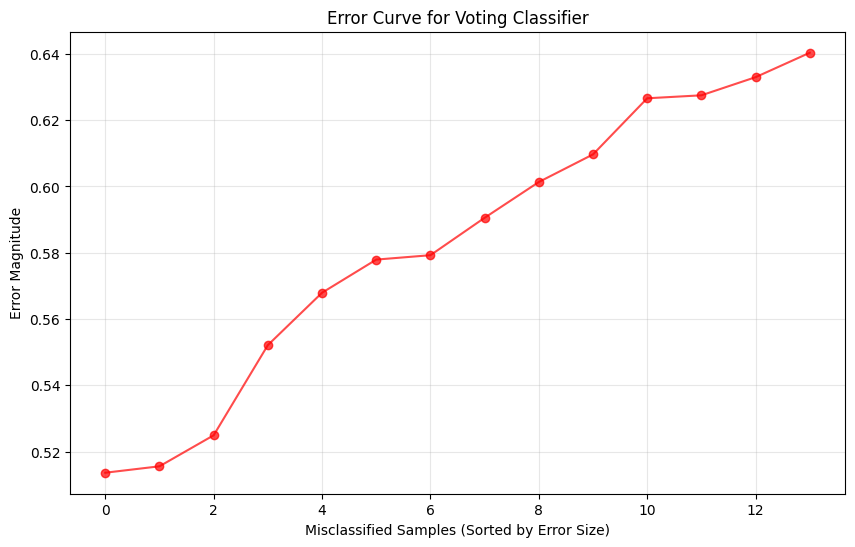

In [163]:
# Error Distribution Line Plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(error_values_sorted)), error_values_sorted, marker='o', linestyle='-', color='red', alpha=0.7)
plt.title("Error Curve for Voting Classifier")
plt.xlabel("Misclassified Samples (Sorted by Error Size)")
plt.ylabel("Error Magnitude")
plt.grid(alpha=0.3)
plt.show()

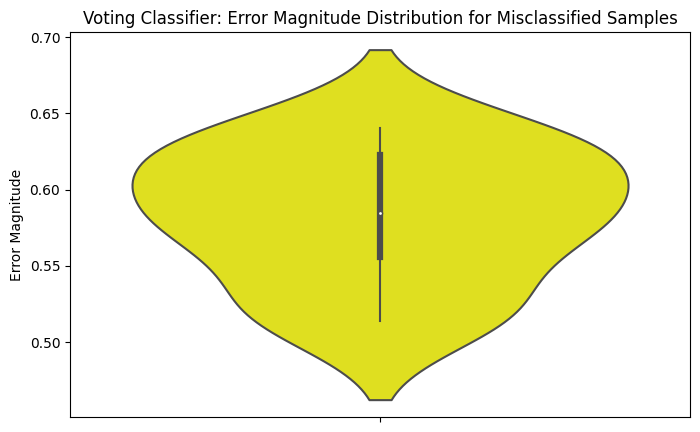

In [164]:
# Violin Plot
plt.figure(figsize=(8, 5))
sns.violinplot(y=error_values, color="yellow", alpha=0.7)
plt.title("Voting Classifier: Error Magnitude Distribution for Misclassified Samples")
plt.ylabel("Error Magnitude")
plt.show()

In [165]:
error_distribution = np.bincount(errors.astype(int))

In [166]:
print("Error Distribution:")
print(f"Correctly Classified: {error_distribution[0]}")
print(f"Misclassified: {error_distribution[1]}")

Error Distribution:
Correctly Classified: 166
Misclassified: 14


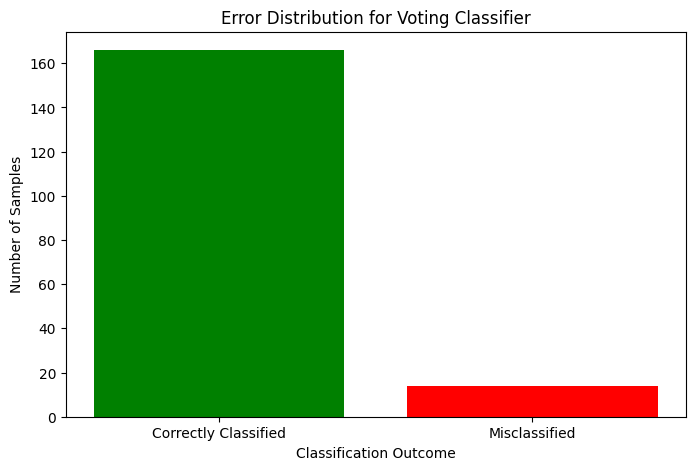

In [167]:
plt.figure(figsize=(8, 5))
plt.bar(['Correctly Classified', 'Misclassified'], error_distribution, color=['green', 'red'])
plt.title("Error Distribution for Voting Classifier")
plt.xlabel("Classification Outcome")
plt.ylabel("Number of Samples")
plt.show()

In [168]:
misclassified_indices = np.where(errors)[0]
print("Indices of Misclassified Samples:")
print(misclassified_indices)

Indices of Misclassified Samples:
[  1  33  52  66  68  73  79  88  99 111 132 147 154 155]


Heatmap of Error Frequency

In [169]:
voting_predictions = y_pred_voting_total 
true_labels = y_test_total.values

In [170]:
errors = (voting_predictions != true_labels).astype(int)

In [171]:
error_df = pd.DataFrame({'Sample': range(len(errors)), 'Error': errors})

In [172]:
error_counts = error_df['Error'].value_counts().sort_index()

In [173]:
heatmap_data = pd.DataFrame({
    'Correct': [len(errors) - errors.sum()],
    'Misclassified': [errors.sum()]
})

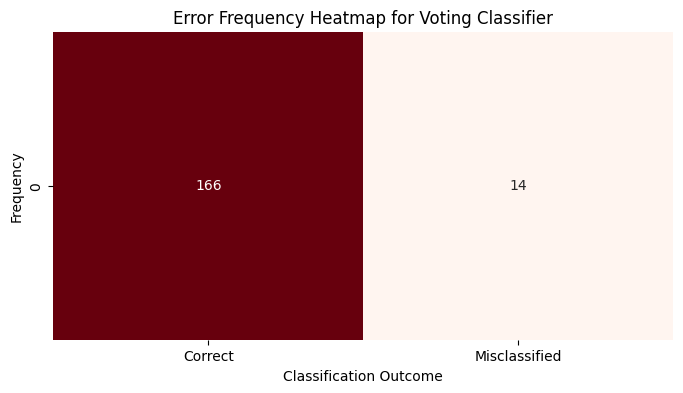

In [174]:
# Heatmap of Error Frequency
plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Reds", cbar=False, xticklabels=True)
plt.title("Error Frequency Heatmap for Voting Classifier")
plt.xlabel("Classification Outcome")
plt.ylabel("Frequency")
plt.xticks([0.5, 1.5], ['Correct', 'Misclassified'], rotation=0)
plt.show()

In [175]:
error_magnitude = np.abs(y_test_total.values - y_pred_proba_voting_total)
heatmap_data = pd.DataFrame(error_magnitude).T

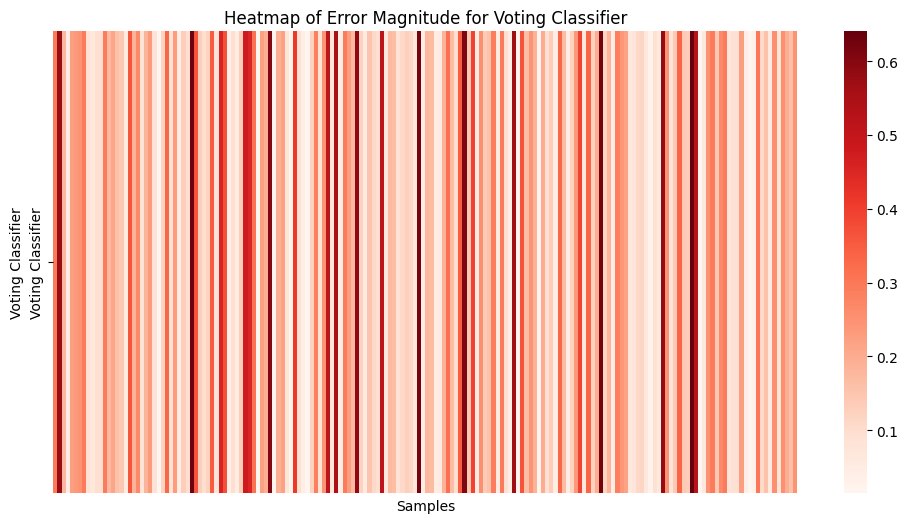

In [176]:
# Error Magnitude Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="Reds", cbar=True, xticklabels=False, yticklabels=["Voting Classifier"])
plt.title("Heatmap of Error Magnitude for Voting Classifier")
plt.xlabel("Samples")
plt.ylabel("Voting Classifier")
plt.show()

**8.2 Precision, Recall, and F1 Score Bar Chart**

In [177]:
precision = precision_score(y_test_total, y_pred_voting_total, average='binary')
recall = recall_score(y_test_total, y_pred_voting_total, average='binary')
f1 = f1_score(y_test_total, y_pred_voting_total, average='binary')

In [178]:
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.9053
Recall: 0.9451
F1 Score: 0.9247


In [179]:
metrics = [precision, recall, f1]
metric_names = ['Precision', 'Recall', 'F1 Score']

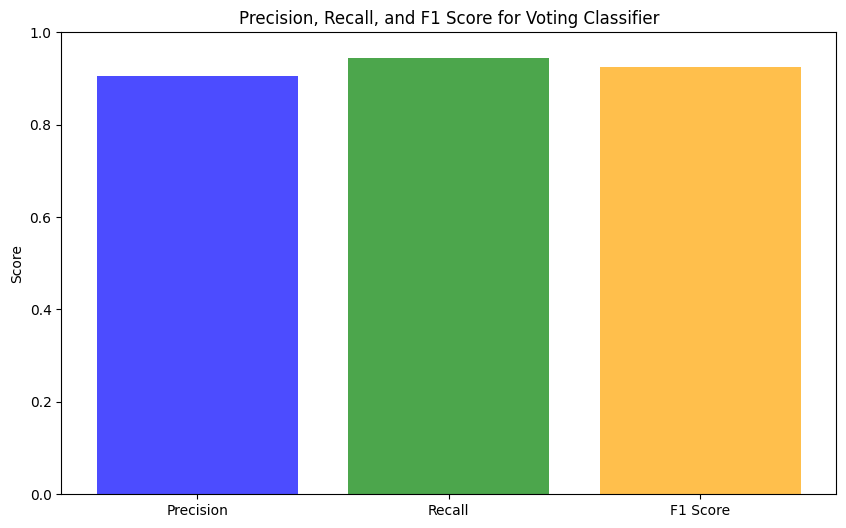

In [180]:
# Precision, Recall, F1 Score 
plt.figure(figsize=(10, 6))
plt.bar(metric_names, metrics, color=['blue', 'green', 'orange'], alpha=0.7)
plt.title("Precision, Recall, and F1 Score for Voting Classifier")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()

# Running Stacking Classifier on 500

Stacking Classifier Now ...

In [181]:
from sklearn.ensemble import StackingClassifier

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('Random Forest', rf_model),
        ('Logistic Regression', lr_model),
        ('SVM', svm_model),
        ('XGBoost', xgb_model)
    ],
    final_estimator=LogisticRegression(),
    stack_method='predict_proba',
    n_jobs=-1
)

In [182]:
print("Size of Training Data (TF-IDF):", X_train_tfidf.shape)
print("Size of Testing Data (TF-IDF):", X_test_tfidf.shape)

Size of Training Data (TF-IDF): (350, 5000)
Size of Testing Data (TF-IDF): (150, 5000)


In [183]:
stacking_clf.fit(X_train_tfidf, y_train)
y_pred_stacking = stacking_clf.predict(X_test_tfidf)
y_pred_proba_stacking = stacking_clf.predict_proba(X_test_tfidf)[:, 1]

In [184]:
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
auc_stacking = roc_auc_score(y_test, y_pred_proba_stacking)
logloss_stacking = log_loss(y_test, y_pred_proba_stacking)
mcc_stacking = matthews_corrcoef(y_test, y_pred_stacking)

In [185]:
report_stacking = classification_report(y_test, y_pred_stacking)

In [186]:
print("Metrics for Stacking Classifier:")
print(f"Accuracy: {accuracy_stacking:.4f}")
print(f"AUC: {auc_stacking:.4f}")
print(f"Log Loss: {logloss_stacking:.4f}")
print(f"MCC: {mcc_stacking:.4f}\n")
print("Classification Report:")
print(report_stacking)

Metrics for Stacking Classifier:
Accuracy: 0.9333
AUC: 0.9847
Log Loss: 0.1693
MCC: 0.8667

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        75
           1       0.93      0.93      0.93        75

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150



# Stacking Classifier on 600 Emails

adding 100 more for stacking ...

In [187]:
# prev 500
print("Original Training Size:", X_train.shape)
print("Original Test Size:", X_test.shape)
print("Additional Data Size:", X_additional.shape)

Original Training Size: (350,)
Original Test Size: (150,)
Additional Data Size: (100,)


In [188]:
# 600
X_combined = pd.concat([X_train, X_test, X_additional], ignore_index=True)
y_combined = pd.concat([y_train, y_test, y_additional], ignore_index=True)
print("Combined Data Size (Raw):", X_combined.shape)
print("Combined Label Size:", y_combined.shape)

Combined Data Size (Raw): (600,)
Combined Label Size: (600,)


In [189]:
X_combined_tfidf = tfidf.fit_transform(X_combined)
print("Total Data Size (TF-IDF):", X_combined_tfidf.shape)
print("Total Label Size:", y_combined.shape)

Total Data Size (TF-IDF): (600, 5000)
Total Label Size: (600,)


In [190]:
# 600 (70/30 Split)
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(
    X_combined_tfidf, y_combined, test_size=0.3, random_state=42, stratify=y_combined
)
print("New Training Size:", X_train_total.shape)
print("New Test Size:", X_test_total.shape)

New Training Size: (420, 5000)
New Test Size: (180, 5000)


In [191]:
stacking_clf.fit(X_train_total, y_train_total)
y_pred_stacking_total = stacking_clf.predict(X_test_total)
y_pred_proba_stacking_total = stacking_clf.predict_proba(X_test_total)[:, 1]

In [192]:
accuracy_stacking_total = accuracy_score(y_test_total, y_pred_stacking_total)
auc_stacking_total = roc_auc_score(y_test_total, y_pred_proba_stacking_total)
logloss_stacking_total = log_loss(y_test_total, y_pred_proba_stacking_total)
mcc_stacking_total = matthews_corrcoef(y_test_total, y_pred_stacking_total)
report_stacking_total = classification_report(y_test_total, y_pred_stacking_total)

In [193]:
print("Metrics for Stacking Classifier on Combined Data:")
print(f"Accuracy: {accuracy_stacking_total:.4f}")
print(f"AUC: {auc_stacking_total:.4f}")
print(f"Log Loss: {logloss_stacking_total:.4f}")
print(f"MCC: {mcc_stacking_total:.4f}\n")
print("Classification Report:")
print(report_stacking_total)

Metrics for Stacking Classifier on Combined Data:
Accuracy: 0.9389
AUC: 0.9912
Log Loss: 0.1434
MCC: 0.8778

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94        89
           1       0.93      0.95      0.94        91

    accuracy                           0.94       180
   macro avg       0.94      0.94      0.94       180
weighted avg       0.94      0.94      0.94       180



Error Distribution and Error Heatmap

In [194]:
errors_stacking = y_pred_stacking_total != y_test_total

In [195]:
error_magnitude_stacking = np.abs(y_test_total - y_pred_proba_stacking_total)

In [196]:
error_values_stacking = error_magnitude_stacking[errors_stacking]

In [197]:
error_values_sorted_stacking = np.sort(error_values_stacking)

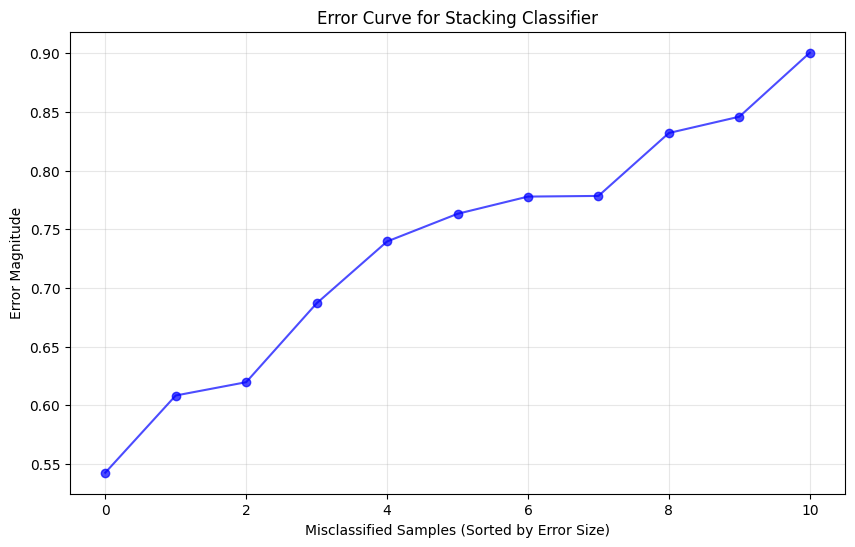

In [198]:
# Error Distribution Line Plot for Stacking Classifier
plt.figure(figsize=(10, 6))
plt.plot(range(len(error_values_sorted_stacking)), error_values_sorted_stacking, marker='o', linestyle='-', color='blue', alpha=0.7)
plt.title("Error Curve for Stacking Classifier")
plt.xlabel("Misclassified Samples (Sorted by Error Size)")
plt.ylabel("Error Magnitude")
plt.grid(alpha=0.3)
plt.show()

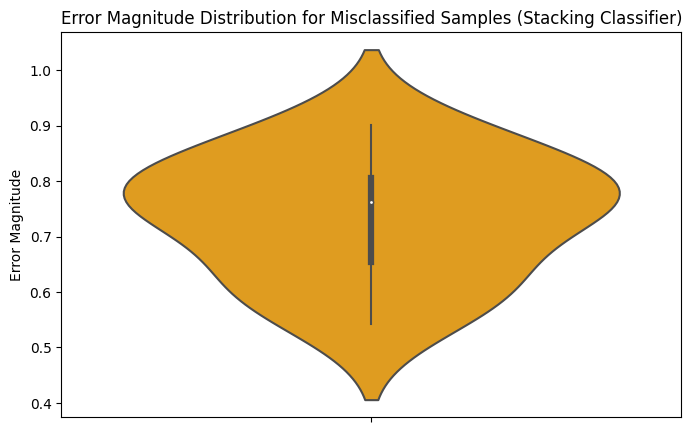

In [199]:
# Violin Plot for Stacking Classifier
plt.figure(figsize=(8, 5))
sns.violinplot(y=error_values_stacking, color="orange", alpha=0.7)
plt.title("Error Magnitude Distribution for Misclassified Samples (Stacking Classifier)")
plt.ylabel("Error Magnitude")
plt.show()

In [200]:
error_distribution_stacking = np.bincount(errors_stacking.astype(int))

In [201]:
print("Error Distribution for Stacking Classifier:")
print(f"Correctly Classified: {error_distribution_stacking[0]}")
print(f"Misclassified: {error_distribution_stacking[1]}")

Error Distribution for Stacking Classifier:
Correctly Classified: 169
Misclassified: 11


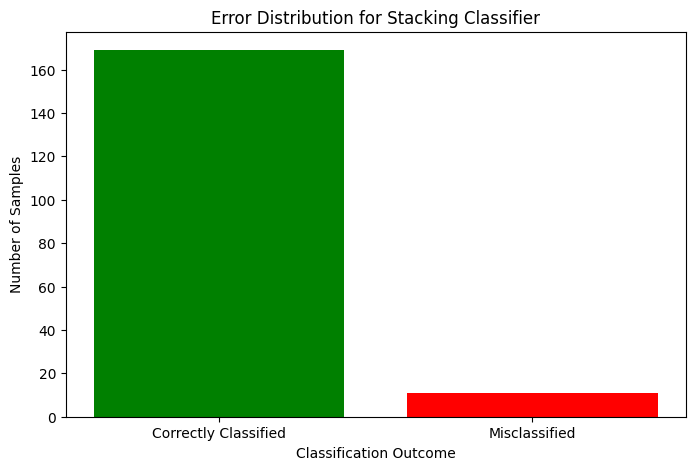

In [202]:
plt.figure(figsize=(8, 5))
plt.bar(['Correctly Classified', 'Misclassified'], error_distribution_stacking, color=['green', 'red'])
plt.title("Error Distribution for Stacking Classifier")
plt.xlabel("Classification Outcome")
plt.ylabel("Number of Samples")
plt.show()

In [203]:
misclassified_indices_stacking = np.where(errors_stacking)[0]
print("Indices of Misclassified Samples (Stacking Classifier):")
print(misclassified_indices_stacking)

Indices of Misclassified Samples (Stacking Classifier):
[ 33  52  68  73  88  99 111 132 147 154 155]


**Heatmap of Error Frequency**

In [204]:
stacking_predictions = y_pred_stacking_total
true_labels = y_test_total.values

In [205]:
errors_stacking = (stacking_predictions != true_labels).astype(int)

In [206]:
error_df_stacking = pd.DataFrame({'Sample': range(len(errors_stacking)), 'Error': errors_stacking})

In [207]:
error_counts_stacking = error_df_stacking['Error'].value_counts().sort_index()

In [208]:
heatmap_data_stacking = pd.DataFrame({
    'Correct': [len(errors_stacking) - errors_stacking.sum()],
    'Misclassified': [errors_stacking.sum()]
})

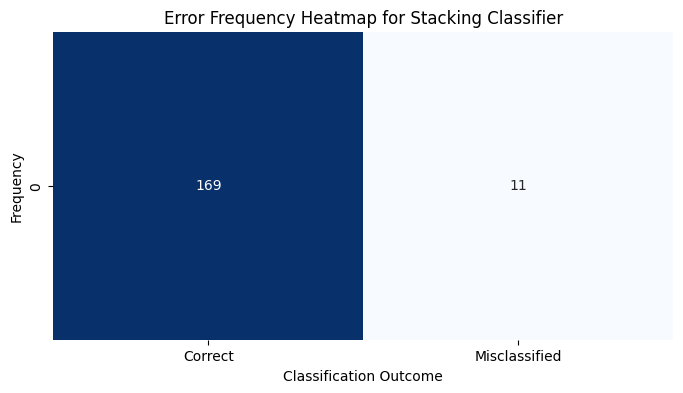

In [209]:
# Heatmap of Error Frequency for Stacking Classifier
plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data_stacking, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=True)
plt.title("Error Frequency Heatmap for Stacking Classifier")
plt.xlabel("Classification Outcome")
plt.ylabel("Frequency")
plt.xticks([0.5, 1.5], ['Correct', 'Misclassified'], rotation=0)
plt.show()

In [210]:
error_magnitude_stacking = np.abs(y_test_total.values - y_pred_proba_stacking_total)
heatmap_data_stacking_magnitude = pd.DataFrame(error_magnitude_stacking).T

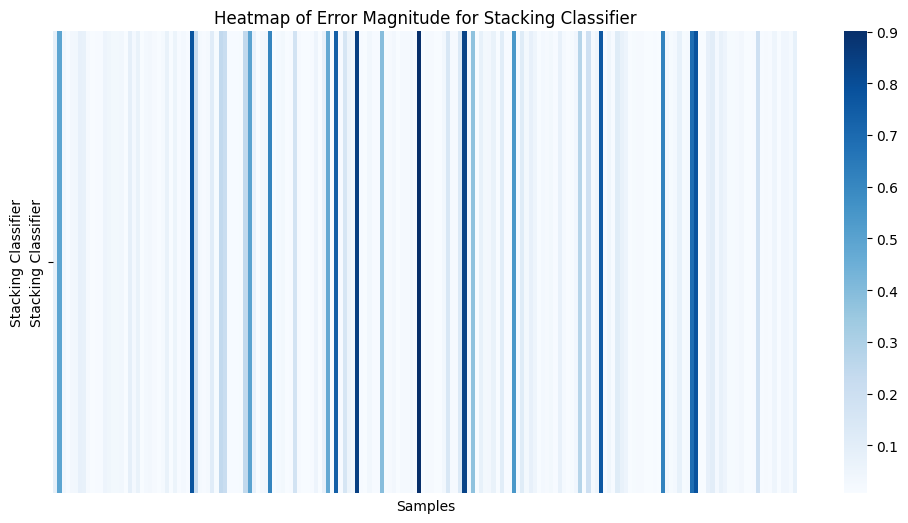

In [211]:
# Error Magnitude Heatmap for Stacking Classifier
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_stacking_magnitude, cmap="Blues", cbar=True, xticklabels=False, yticklabels=["Stacking Classifier"])
plt.title("Heatmap of Error Magnitude for Stacking Classifier")
plt.xlabel("Samples")
plt.ylabel("Stacking Classifier")
plt.show()

**8.2 Precision, Recall, and F1 Score Bar Chart**

In [212]:
precision_stacking = precision_score(y_test_total, y_pred_stacking_total, average='binary')
recall_stacking = recall_score(y_test_total, y_pred_stacking_total, average='binary')
f1_stacking = f1_score(y_test_total, y_pred_stacking_total, average='binary')

In [213]:
print(f"Precision: {precision_stacking:.4f}")
print(f"Recall: {recall_stacking:.4f}")
print(f"F1 Score: {f1_stacking:.4f}")

Precision: 0.9348
Recall: 0.9451
F1 Score: 0.9399


In [214]:
metrics_stacking = [precision_stacking, recall_stacking, f1_stacking]
metric_names = ['Precision', 'Recall', 'F1 Score']

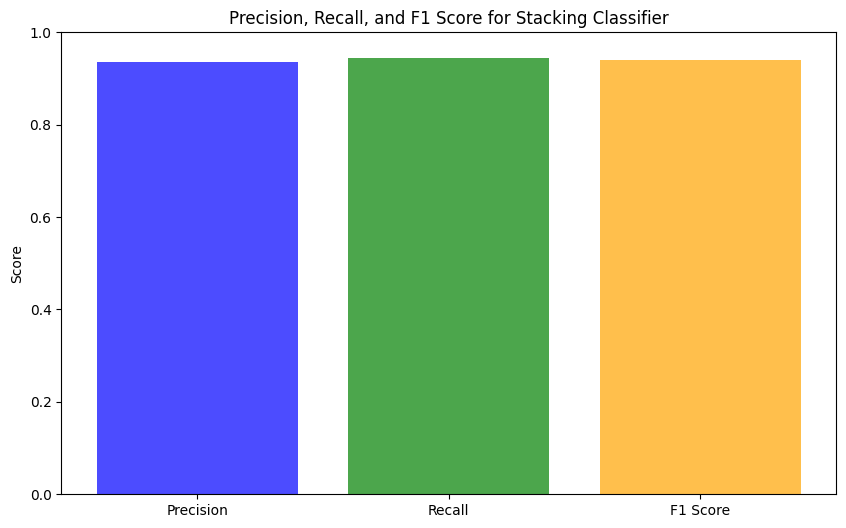

In [215]:
plt.figure(figsize=(10, 6))
plt.bar(metric_names, metrics_stacking, color=['blue', 'green', 'orange'], alpha=0.7)
plt.title("Precision, Recall, and F1 Score for Stacking Classifier")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()

**9. Test on an additional 100 emails, documenting performance metrics (precision, recall, etc.).**

**9.2 Aggregated confusion matrix, ROC curve comparison (pre-improved vs. post-improved).**

**Voting Classifier on 700**

- Accuracy: 0.9714
- AUC: 0.9986
- Log Loss: 0.1546
- MCC: 0.9435

**Stacking Classifier on 700**

- Accuracy: 0.9762
- AUC: 0.9985
- Log Loss: 0.0709
- MCC: 0.9528

# 700 Data (Additional 100 Emails)

In [216]:
X_new_100 = X_additional.copy()  
y_new_100 = y_additional.copy()

In [217]:
X_combined_700 = pd.concat([X_combined, X_new_100], ignore_index=True)
y_combined_700 = pd.concat([y_combined, y_new_100], ignore_index=True)

In [218]:
print("700 Combined Data Size (Raw):", X_combined_700.shape)
print("700 Combined Label Size:", y_combined_700.shape)

700 Combined Data Size (Raw): (700,)
700 Combined Label Size: (700,)


In [219]:
X_combined_700_tfidf = tfidf.fit_transform(X_combined_700)
print("700 Combined Data Size (TF-IDF):", X_combined_700_tfidf.shape)
print("700 Combined Label Size:", y_combined_700.shape)

700 Combined Data Size (TF-IDF): (700, 5000)
700 Combined Label Size: (700,)


In [220]:
X_train_700, X_test_700, y_train_700, y_test_700 = train_test_split(
    X_combined_700_tfidf, y_combined_700, test_size=0.3, random_state=42, stratify=y_combined_700
)
print("New Training Size (700):", X_train_700.shape)
print("New Test Size (700):", X_test_700.shape)

New Training Size (700): (490, 5000)
New Test Size (700): (210, 5000)


# 700 on Voting Classifier

In [221]:
voting_clf.fit(X_train_700, y_train_700)
y_pred_voting_700 = voting_clf.predict(X_test_700)
y_pred_proba_voting_700 = voting_clf.predict_proba(X_test_700)[:, 1]

In [222]:
accuracy_voting_700 = accuracy_score(y_test_700, y_pred_voting_700)
auc_voting_700 = roc_auc_score(y_test_700, y_pred_proba_voting_700)
logloss_voting_700 = log_loss(y_test_700, y_pred_proba_voting_700)
mcc_voting_700 = matthews_corrcoef(y_test_700, y_pred_voting_700)
report_voting_700 = classification_report(y_test_700, y_pred_voting_700)

In [223]:
print("Metrics for Voting Classifier on 700 Samples:")
print(f"Accuracy: {accuracy_voting_700:.4f}")
print(f"AUC: {auc_voting_700:.4f}")
print(f"Log Loss: {logloss_voting_700:.4f}")
print(f"MCC: {mcc_voting_700:.4f}\n")
print("Classification Report:")
print(report_voting_700)

Metrics for Voting Classifier on 700 Samples:
Accuracy: 0.9714
AUC: 0.9988
Log Loss: 0.1699
MCC: 0.9435

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       104
           1       0.95      0.99      0.97       106

    accuracy                           0.97       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210



# 700 on Stacking Classifier

In [224]:
stacking_clf.fit(X_train_700, y_train_700)
y_pred_stacking_700 = stacking_clf.predict(X_test_700)
y_pred_proba_stacking_700 = stacking_clf.predict_proba(X_test_700)[:, 1]

In [225]:
accuracy_stacking_700 = accuracy_score(y_test_700, y_pred_stacking_700)
auc_stacking_700 = roc_auc_score(y_test_700, y_pred_proba_stacking_700)
logloss_stacking_700 = log_loss(y_test_700, y_pred_proba_stacking_700)
mcc_stacking_700 = matthews_corrcoef(y_test_700, y_pred_stacking_700)
report_stacking_700 = classification_report(y_test_700, y_pred_stacking_700)

In [226]:
print("Metrics for Stacking Classifier on 700 Samples:")
print(f"Accuracy: {accuracy_stacking_700:.4f}")
print(f"AUC: {auc_stacking_700:.4f}")
print(f"Log Loss: {logloss_stacking_700:.4f}")
print(f"MCC: {mcc_stacking_700:.4f}\n")
print("Classification Report:")
print(report_stacking_700)

Metrics for Stacking Classifier on 700 Samples:
Accuracy: 0.9762
AUC: 0.9987
Log Loss: 0.0679
MCC: 0.9528

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       104
           1       0.96      0.99      0.98       106

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



**9.2 Data Science Requirements**

- Aggregated confusion matrix
- ROC curve comparison (pre-improved vs. post-improved).

Confision Matrix Comparing Voting and Stacking Classifiers

In [227]:
y_true = y_test_total

In [228]:
y_pred_voting = y_pred_voting_total
y_proba_voting = y_pred_proba_voting_total
y_pred_stacking = y_pred_stacking_total
y_proba_stacking = y_pred_proba_stacking_total

In [229]:
conf_matrix_voting = confusion_matrix(y_true, y_pred_voting)

In [230]:
conf_matrix_stacking = confusion_matrix(y_true, y_pred_stacking)

In [231]:
print("Voting Classifier Confusion Matrix:")
print(conf_matrix_voting)
print("\nStacking Classifier Confusion Matrix:")
print(conf_matrix_stacking)

Voting Classifier Confusion Matrix:
[[80  9]
 [ 5 86]]

Stacking Classifier Confusion Matrix:
[[83  6]
 [ 5 86]]


In [232]:
conf_matrix_voting = confusion_matrix(y_true, y_pred_voting)
conf_matrix_stacking = confusion_matrix(y_true, y_pred_stacking)

In [233]:
def plot_confusion_matrix(cm, title, labels=['Negative', 'Positive']):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

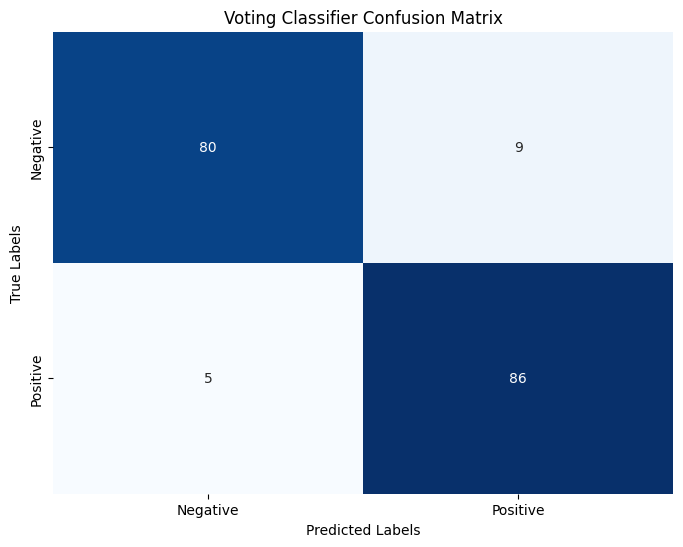

In [234]:
plot_confusion_matrix(conf_matrix_voting, "Voting Classifier Confusion Matrix")

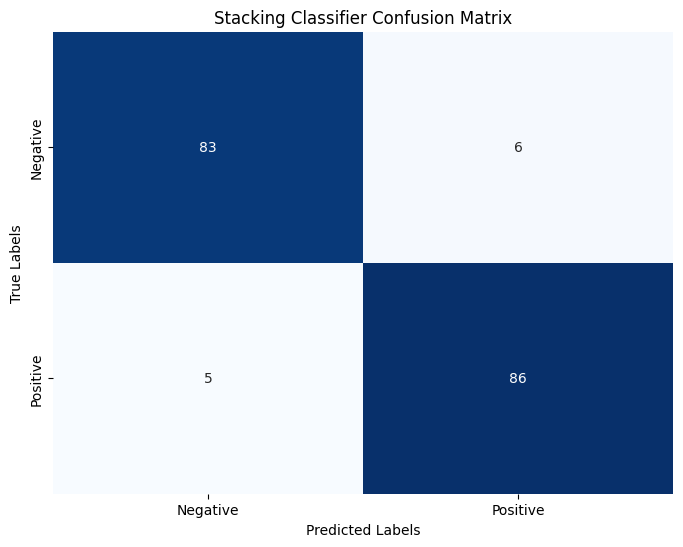

In [235]:
plot_confusion_matrix(conf_matrix_stacking, "Stacking Classifier Confusion Matrix")

ROC Curve

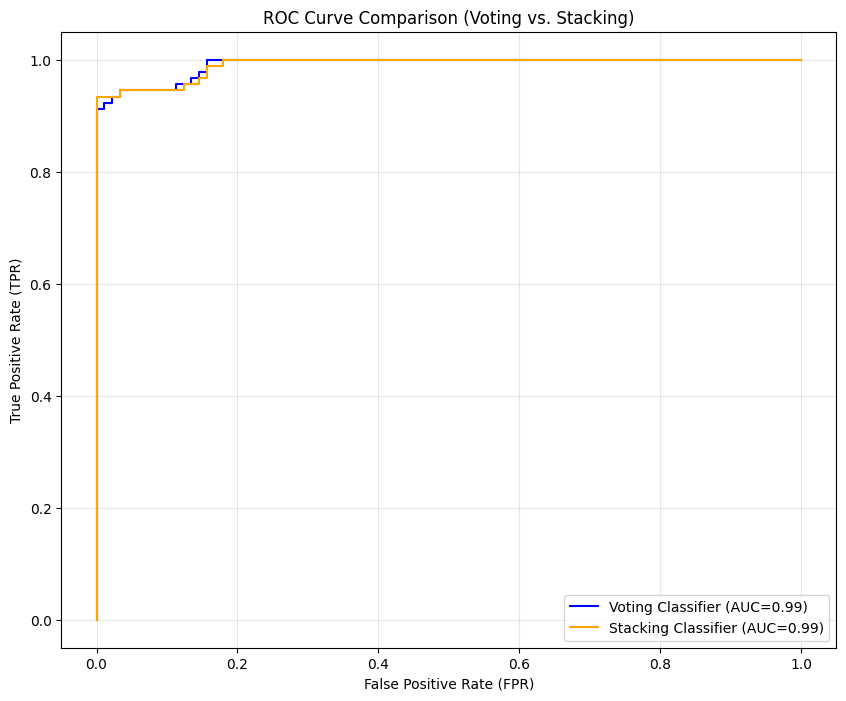

In [236]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

#Voting Classifier ROC
fpr_voting, tpr_voting, _ = roc_curve(y_true, y_proba_voting)
auc_voting = auc(fpr_voting, tpr_voting)
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC={auc_voting:.2f})', color='blue')

# Stacking Classifier ROC
fpr_stacking, tpr_stacking, _ = roc_curve(y_true, y_proba_stacking)
auc_stacking = auc(fpr_stacking, tpr_stacking)
plt.plot(fpr_stacking, tpr_stacking, label=f'Stacking Classifier (AUC={auc_stacking:.2f})', color='orange')

# Voting v.s. Stacking Comparison
plt.title("ROC Curve Comparison (Voting vs. Stacking)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**Week 10 - Summary visualizations for Presentation**

- Model performance over time (line chart)
- Key metric comparison charts.

In [237]:
models = ["XGBoost", "SVM", "Logistic Regression", "Random Forest"]
week_3_acc = [0.79, 0.94, 0.93, 0.84]  
week_7_acc = [0.85, 0.9467, 0.94667, 0.90]

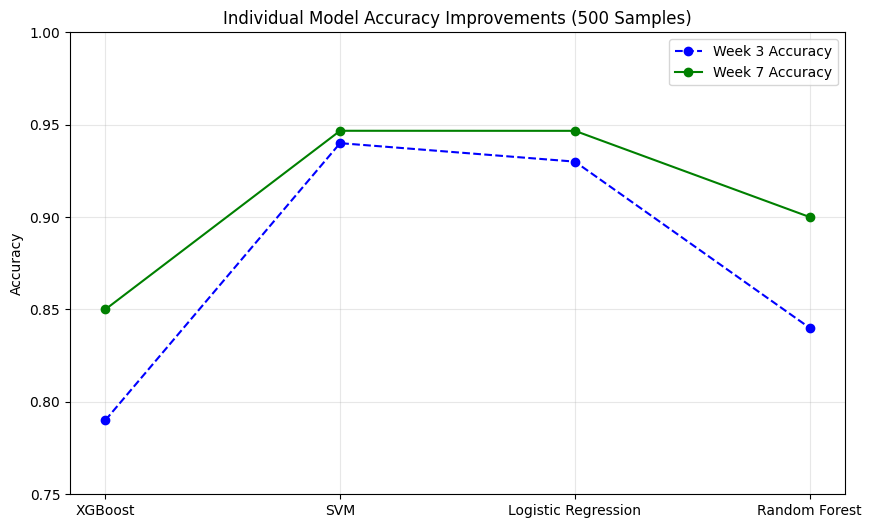

In [238]:
plt.figure(figsize=(10, 6))
plt.plot(models, week_3_acc, marker='o', label="Week 3 Accuracy", linestyle='--', color='blue')
plt.plot(models, week_7_acc, marker='o', label="Week 7 Accuracy", linestyle='-', color='green')
plt.title("Individual Model Accuracy Improvements (500 Samples)")
plt.ylabel("Accuracy")
plt.ylim(0.75, 1)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [239]:
# week 3
accuracy_3 = [0.83, 0.93, 0.94, 0.79]
error_rate_3 = [0.17, 0.07, 0.06, 0.21]
auc_3 = [0.92, 0.98, 0.88, 0.58]
mcc_3 = [0.74, 0.88, 0.88, 0.58]
log_loss_3 = [0.38, 0.46, 0.14, 0.42]

In [240]:
# week 7
accuracy_7 = [0.90, 0.946667, 0.946667, 0.853333]
auc_7 = [0.9624, 0.989511, 0.989156, 0.934756]
logloss_7 = [0.350897, 0.273688, 0.136842, 0.344038]
mcc_7 = [0.805823, 0.893651, 0.893651, 0.710721]

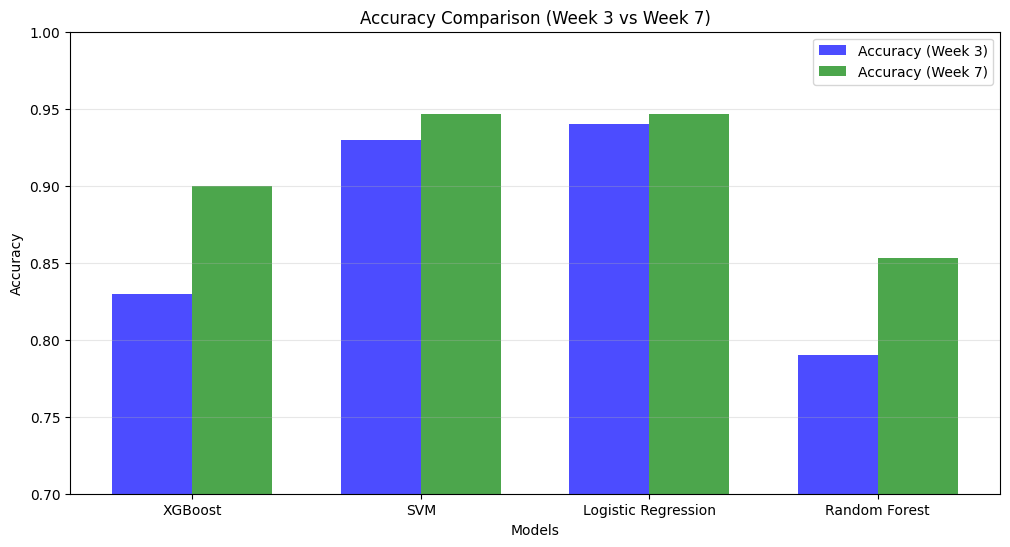

In [241]:
# accuracy comparison

plt.figure(figsize=(12, 6))
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, accuracy_3, width, label="Accuracy (Week 3)", color="blue", alpha=0.7)
plt.bar(x + width/2, accuracy_7, width, label="Accuracy (Week 7)", color="green", alpha=0.7)

plt.title("Accuracy Comparison (Week 3 vs Week 7)")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(x, models)
plt.ylim(0.7, 1)
plt.legend()
plt.grid(alpha=0.3, axis="y")
plt.show()

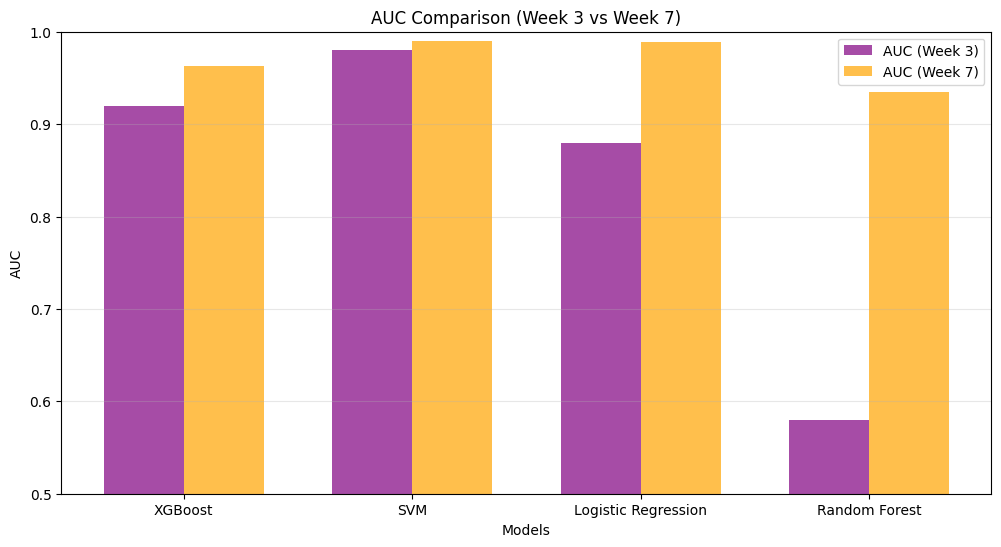

In [242]:
# auc comparison
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, auc_3, width, label="AUC (Week 3)", color="purple", alpha=0.7)
plt.bar(x + width/2, auc_7, width, label="AUC (Week 7)", color="orange", alpha=0.7)

plt.title("AUC Comparison (Week 3 vs Week 7)")
plt.xlabel("Models")
plt.ylabel("AUC")
plt.xticks(x, models)
plt.ylim(0.5, 1)
plt.legend()
plt.grid(alpha=0.3, axis="y")
plt.show()

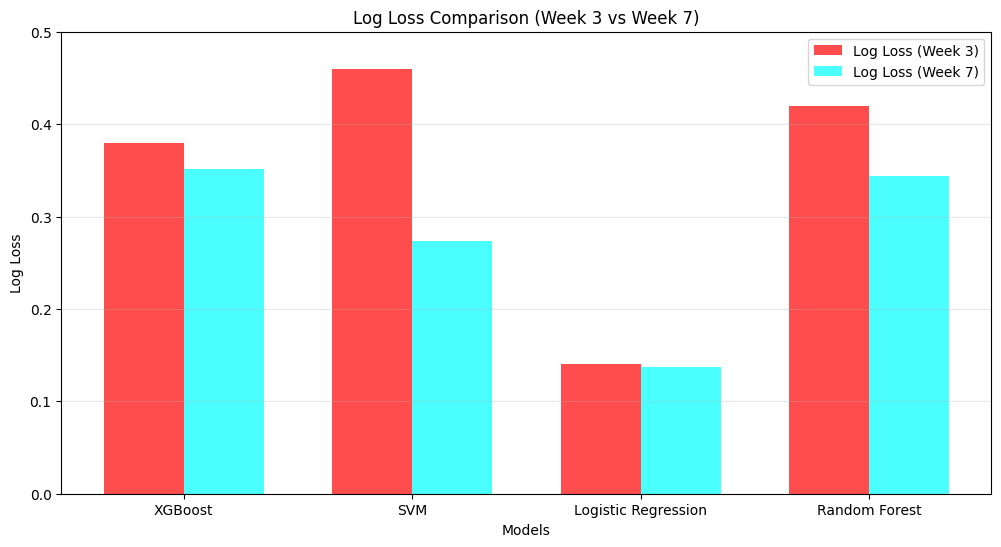

In [243]:
# log loss
plt.figure(figsize=(12, 6))

plt.bar(x - width/2, log_loss_3, width, label="Log Loss (Week 3)", color="red", alpha=0.7)
plt.bar(x + width/2, logloss_7, width, label="Log Loss (Week 7)", color="cyan", alpha=0.7)

plt.title("Log Loss Comparison (Week 3 vs Week 7)")
plt.xlabel("Models")
plt.ylabel("Log Loss")
plt.xticks(x, models)
plt.ylim(0, 0.5)
plt.legend()
plt.grid(alpha=0.3, axis="y")
plt.show()

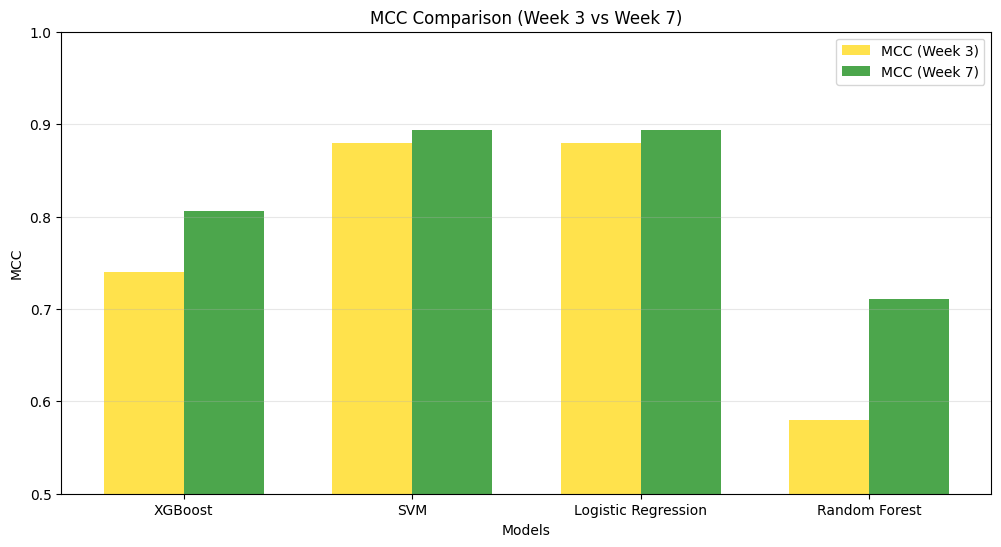

In [244]:
# MCC
plt.figure(figsize=(12, 6))

plt.bar(x - width/2, mcc_3, width, label="MCC (Week 3)", color="gold", alpha=0.7)
plt.bar(x + width/2, mcc_7, width, label="MCC (Week 7)", color="green", alpha=0.7)

plt.title("MCC Comparison (Week 3 vs Week 7)")
plt.xlabel("Models")
plt.ylabel("MCC")
plt.xticks(x, models)
plt.ylim(0.5, 1)
plt.legend()
plt.grid(alpha=0.3, axis="y")
plt.show()

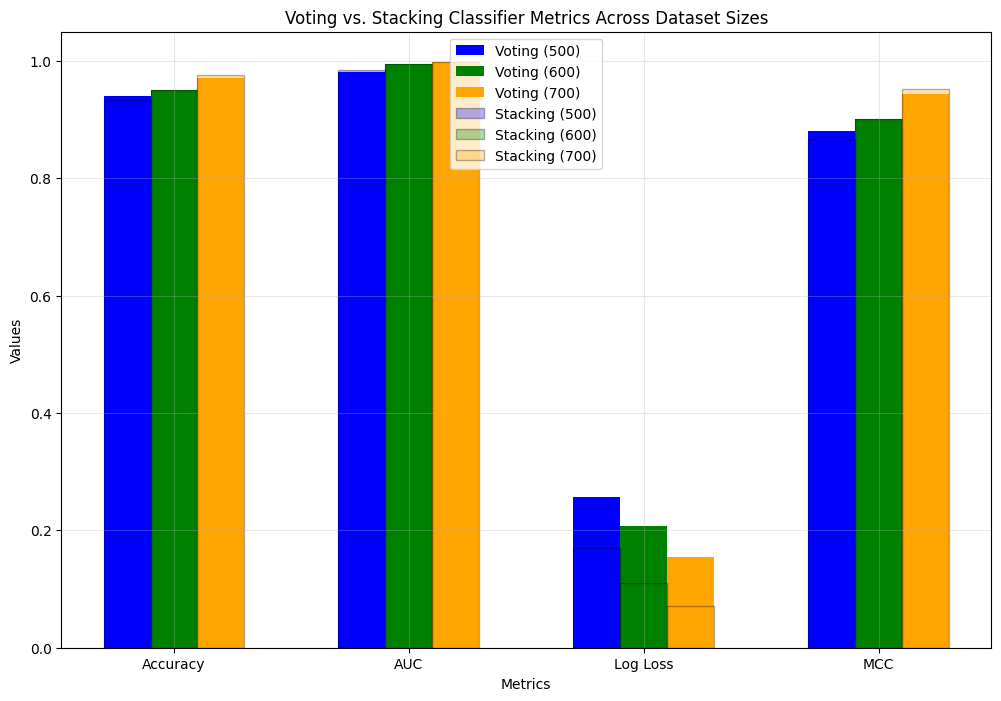

In [245]:
# Voting v.s. Stacking Classifier Bar Chart
metrics = ["Accuracy", "AUC", "Log Loss", "MCC"]
voting_metrics_500 = [0.94, 0.9820, 0.2573, 0.8801]
voting_metrics_600 = [0.95, 0.9956, 0.2072, 0.9014]
voting_metrics_700 = [0.9714, 0.9986, 0.1546, 0.9435]

stacking_metrics_500 = [0.9333, 0.9847, 0.1693, 0.8667]
stacking_metrics_600 = [0.95, 0.9951, 0.1097, 0.9005]
stacking_metrics_700 = [0.9762, 0.9985, 0.0709, 0.9528]


x = np.arange(len(metrics))  
width = 0.2  

plt.figure(figsize=(12, 8))
plt.bar(x - width, voting_metrics_500, width, label="Voting (500)", color='blue')
plt.bar(x, voting_metrics_600, width, label="Voting (600)", color='green')
plt.bar(x + width, voting_metrics_700, width, label="Voting (700)", color='orange')

plt.bar(x - width, stacking_metrics_500, width, label="Stacking (500)", alpha=0.3, color='blue', edgecolor='black')
plt.bar(x, stacking_metrics_600, width, label="Stacking (600)", alpha=0.3, color='green', edgecolor='black')
plt.bar(x + width, stacking_metrics_700, width, label="Stacking (700)", alpha=0.3, color='orange', edgecolor='black')

# Chart details
plt.title("Voting vs. Stacking Classifier Metrics Across Dataset Sizes")
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.xticks(x, metrics)
plt.ylim(0, 1.05)  
plt.legend()
plt.grid(alpha=0.3)
plt.show()

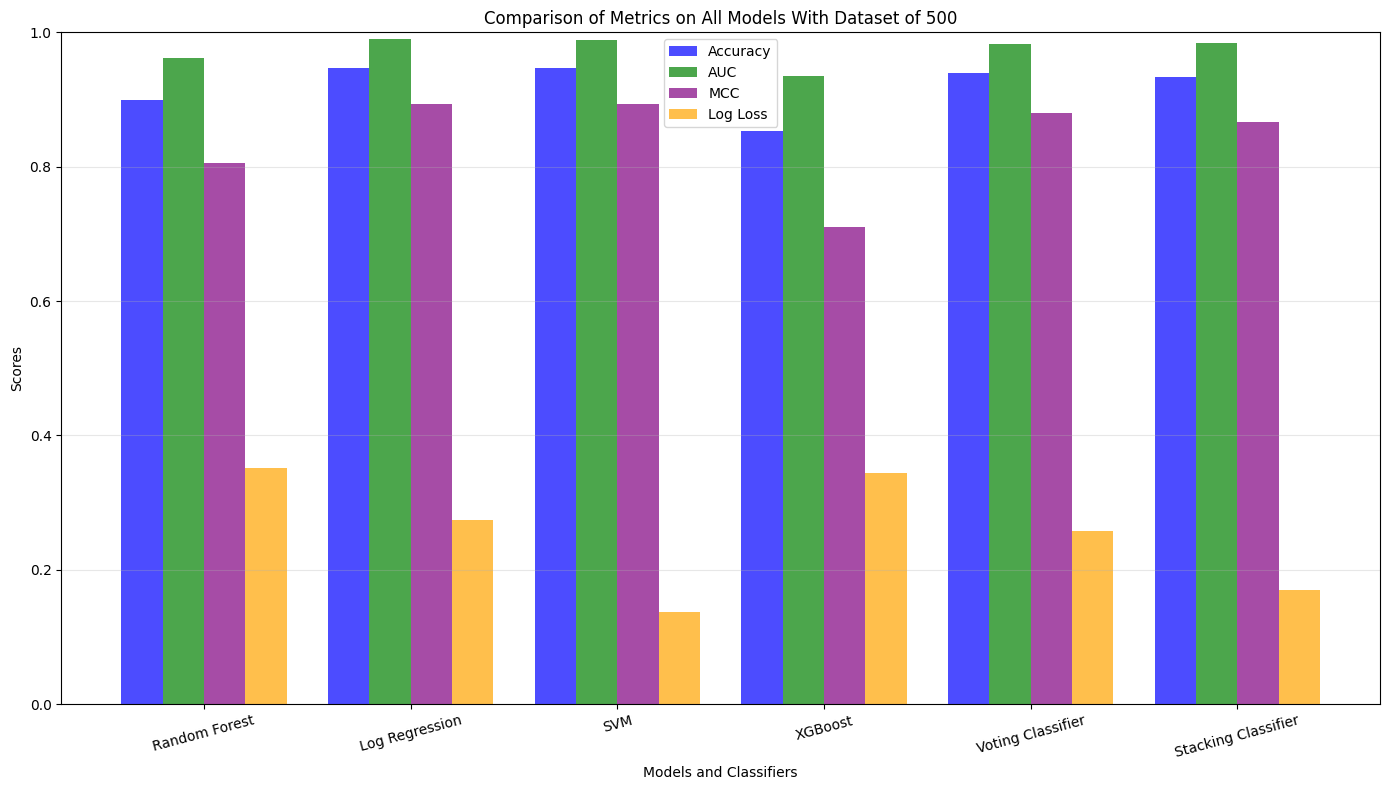

In [246]:
# compare all models on 500 (accuracy and auc)

labels = ["Random Forest", "Log Regression", "SVM", "XGBoost", "Voting Classifier", "Stacking Classifier"]

accuracy = [0.90, 0.946667, 0.946667, 0.853333, 0.94, 0.9333]
auc = [0.9624, 0.989511, 0.989156, 0.934756, 0.982, 0.9847]
mcc = [0.805823, 0.893651, 0.893651, 0.710721, 0.8801, 0.8667]
log_loss = [0.350897, 0.273688, 0.136842, 0.344038, 0.2573, 0.1693]

plt.figure(figsize=(14, 8))
x = np.arange(len(labels))
width = 0.2

plt.bar(x - 1.5 * width, accuracy, width, label="Accuracy", color="blue", alpha=0.7)
plt.bar(x - 0.5 * width, auc, width, label="AUC", color="green", alpha=0.7)
plt.bar(x + 0.5 * width, mcc, width, label="MCC", color="purple", alpha=0.7)
plt.bar(x + 1.5 * width, log_loss, width, label="Log Loss", color="orange", alpha=0.7)

plt.title("Comparison of Metrics on All Models With Dataset of 500")
plt.xlabel("Models and Classifiers")
plt.ylabel("Scores")
plt.xticks(x, labels, rotation=15)
plt.ylim(0, 1)
plt.legend()
plt.grid(alpha=0.3, axis="y")
plt.tight_layout()
plt.show()

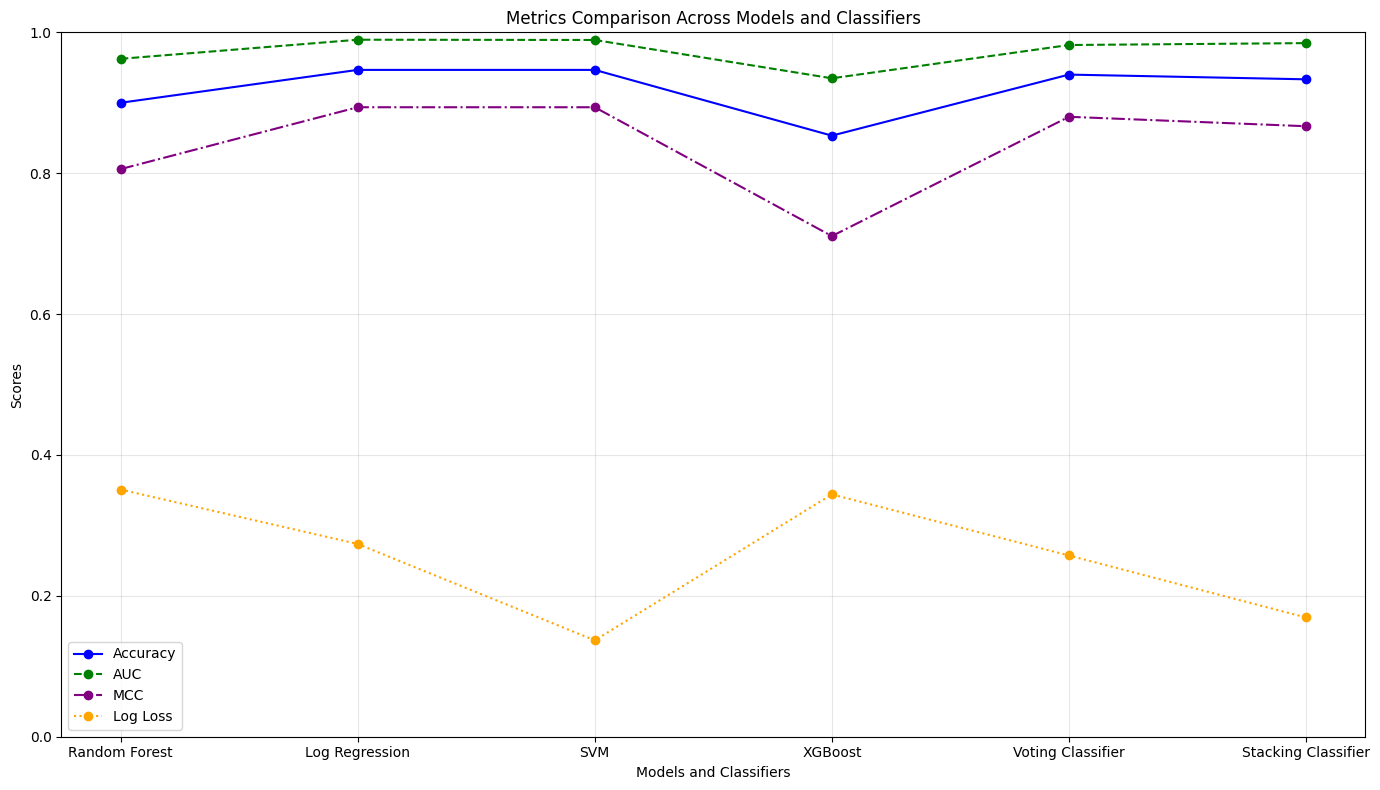

In [247]:
plt.figure(figsize=(14, 8))

plt.plot(labels, accuracy, marker="o", label="Accuracy", linestyle="-", color="blue")
plt.plot(labels, auc, marker="o", label="AUC", linestyle="--", color="green")
plt.plot(labels, mcc, marker="o", label="MCC", linestyle="-.", color="purple")
plt.plot(labels, log_loss, marker="o", label="Log Loss", linestyle=":", color="orange")

plt.title("Metrics Comparison Across Models and Classifiers")
plt.xlabel("Models and Classifiers")
plt.ylabel("Scores")
plt.ylim(0, 1)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()